## Introduction

Predict who will survive or die in the Titanic dataset. Familiarize myself with Python data analysis.

*Note: Codes may also come from other kernels for practice/workflow

## Modeling Framework

1. Framing the problem
    - What are we trying to solve?
    - Understand the problem and ask questions
2. Collecting Relevant Information & Data
    - What type of data do we have?
    - What other requirements are there?
    - What is considered a success for this problem?
3. Process for analysis (Preprocessing & Cleaning)
    - How does the data structure look like?
    - Is the data usable?
    - Can the data be plotted?
    - What changes do we need to do to make the data usable?
    - What type of predictive problem are we trying to answer?
        - Models we can use
        - What are the model inputs? Figure out the data inputs needed for the model to work.
    - Check for common errors like missing values, corrupted values, dates
4. Explore the data (Exploratory Data Analysis)
    - How does the data look like?
    - Are there any patterns?
        - Identify using summary statistics, plotting, counting, etc.
    - Familiarizing process
5. Feature Engineering (Applied Machine Learning)
    - Can we create more features that will be helpful to the model?
6. Statistical Analysis
    - Univariate, bivariate, multivariate analysis of features
7. Modeling & Scoring
    - Splitting the data into train/test
    - Standardizing data
    - What models are appropriate?
        - Regression
    - Pre-Tuning
    - Cross-Validating
    - Hyperarameter Tuning
    - Tuned Models Using Best Hyperparameters
    - Comparison: Pre-Tuning vs. CV vs. Tuned Model vs. CV Tuned 
8. Evaluation
    - How accurate are the models?
    - What evaluation metric is appropriate?
    - Is the model good enough?
    - Iteration needed?
9. Results & Productionize
    - Can we create the entire dataset and prediction on a website?

### Framing the problem

Predict the passenger survival rate using the train and test data.

### Collecting relevant data

In [1]:
# Set directory

import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 'house']

### Import libraries & data

In [2]:
'''Import data analysis & visualization libraries'''
import pandas as pd
import numpy as np
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import train and test data

train = pd.read_csv('07-train.csv')
test = pd.read_csv('07-test.csv')

# Create a column to distinguish train vs. test
train['DataType'] = 'Train'
test['DataType'] = 'Test'

# Combine datasets into a dataframe
comb = [train, test]
combined = pd.concat(comb, sort='False', ignore_index=False)

# Check
combined.head()

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,Train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,Train,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,Train,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,Train,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,Train,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Preprocessing

Are we able to use the data right away? What type of issues does the data have? How do we fix the issues?

Count the nulls in each column and identify the data types as well.

In [4]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''

"\n\nSome functions to start off with:\n\ntrain.sample()                                           \ntrain.describe()\n    train.describe(include=['O'])\n    train.describe(include='all')\ntrain.head()\ntrain.tail()\ntrain.value_counts().sum()\ntrain.isnull().sum()\ntrain.count()\ntrain.fillna()\n    train..fillna(train[col].mode(), inplace=True)\ntrain.mean()\ntrain.median()\ntrain.mode()\ntrain.shape\ntrain.info()\n\n"

In [5]:
# Get data shape, info, columns, & dimensions
print ("*"*40)
print('********** train shape: ' + str(train.shape) + '*'*10)
print (train.info())
print ("*"*40)
print('********** test shape: ' + str(test.shape) + '*'*10)
print (test.info())

****************************************
********** train shape: (891, 13)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
DataType       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
****************************************
********** test shape: (418, 12)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null objec

### Feature descriptions
1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The Age and Fare variable are continuous quantitative datatypes.
7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

How does the survival distribution look like before we explore.

In [6]:
# Overview of the data between survived and did not survive
survived_summary = combined.groupby('Survived')
survived_summary.mean().reset_index()

,Survived,Age,Fare,Parch,PassengerId,Pclass,SibSp
0,0.0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,1.0,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


### Are there null values?

In [7]:
combined.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
DataType          0
dtype: int64

In [8]:
# The function value_counts() is a series method so we have to use count() instead
combined.count()

Age            1046
Cabin           295
DataType       1309
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

In [9]:
# Get null percentage per column'''
totalnull = combined.isnull().sum().sort_values(ascending=False)
percentnull = round(combined.isnull().sum().sort_values(ascending=False)/len(combined)*100,2)

# Combine horizontally (axis=1) into a dataframe with column names (keys=[])
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,1014,77.46
Survived,418,31.93
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08
Ticket,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00


### Ways to clean up null values

There are several methods on how to handle missing values. There are always some instance where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted, and more. So understanding a couple methods in handling the NULL/NaN values are crucial. Pandas provides a dropna() function that can be used to drop either columns or rows with missing data.

Some methods are listed below:

1. Removing the rows with missing values using dropna() function
    - inplace parameter: If True, do operation inplace and return None.
    - axis parameter: drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
2. Impute the missing values using fillna():
    - Constant value that has meaning within the domain; ex: 0 for not present
    - Value from another randomly selected record (could be random or have the business acumen to figure out a value)
    - Mean, median, mode
    - Value estimated by a predictive model
3. Binning
    - Binning the values that are not present which could provide insight
4. Ignore and leave it as it is

### Embarked

There are a total of 2 null values. Let's explore the feature.

In [10]:
# Create dataframes of Embarked values
embarked_n = pd.DataFrame(combined.Embarked.value_counts(dropna=False))
embarked_p = pd.DataFrame(round(combined.Embarked.value_counts(dropna=False)/len(combined)*100,2))

# Rename dataframe columns
embarked_n.columns = ['Total']
embarked_p.columns = ['Percent']

# Combine the dataframes together
pd.concat([embarked_n, embarked_p], axis=1) # keys=['Total', 'Percent'])

,Total,Percent
S,914,69.82
C,270,20.63
Q,123,9.40
NaN,2,0.15


Another way we can build a percentage column is to use the normalize parameter and passing index, columns, or all as the argument.

In [11]:
# Use crosstab() from pandas and name the indexes & columns
embarked_survival_table = pd.crosstab(index=combined['Embarked'],
                                     columns=combined['Survived'],
                                     normalize='all',
                                     margins=True)

# Add names for the crosstab
embarked_survival_table.columns = ['Did not Survive', 'Survived', 'RowTotal']
embarked_survival_table.index = ['C', 'Q', 'S', 'ColTotal']

embarked_survival_table

'''
Without normalize parameter
embarked_survival_table/embarked_survival_table.loc['ColTotal', 'RowTotal']
'''

"\nWithout normalize parameter\nembarked_survival_table/embarked_survival_table.loc['ColTotal', 'RowTotal']\n"

Looks like a majority of the people boarded from S (Southampton). The others are C (Cherbourg) and Q (Queenstown). Is there a wealth inequality between the three areas? What's the survival rate between the 3?

But first, what are the null values.

In [12]:
# Slice the dataframe to get null Embarked rows
combined[combined.Embarked.isnull()]

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,Train,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,Train,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Both the null values are females from the same cabin. I would think they would be related but their last names are not the same. They are also female and also survived. I can try to do a random forest to see if it predicts them to be in the higher survival Embarked group of females or I can use business acumen to place them within a group of females that survived and paid a $80 Fare that is also 1st class or just about. 

Here's a picture below of the locations. Looks like Queenstown was the last city.

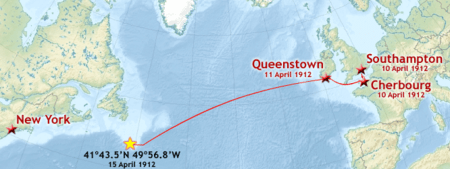

In [13]:
from IPython.display import Image
url = 'https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png'
Image(url,width=600, height=800)

In [14]:
# Group by survival rate and embarked
combined.groupby(['Survived', 'Embarked']).Embarked.count()

Survived  Embarked
0.0       C            75
          Q            47
          S           427
1.0       C            93
          Q            30
          S           217
Name: Embarked, dtype: int64

#### This is a little hard to read, let's try another way.

In [15]:
combined[['Embarked', 'Sex', 'Survived']].groupby(['Embarked', 'Sex']).mean()

Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603

So it looks like Cherbourg has the highest survival rate out of the grouped attributes. So I will group the null values of the two to be from Cherbourg.

We can use the fillna() function to input the 'C' values where Embarked is null.

### Using value_counts(normalize=True) to get frequency percentage

In [16]:
round(combined.Embarked.value_counts(normalize=True)*100,2)

S    69.93
C    20.66
Q     9.41
Name: Embarked, dtype: float64

In [17]:
combined['Embarked'].fillna('C', inplace=True) # Using inplace() for memory

In [18]:
combined.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
Embarked          0
DataType          0
dtype: int64

Let's take a look visually now that we have all values in the feature populated. We can use matplotlib and its functions to:
1. Create a figure space
2. Plot the data
3. Update any figure settings

**Before modeling, create plots togther in 1 figure space that will pair up the train vs. test distributions to see if distributions vary a lot.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001444B7429E8>,
      dtype=object)

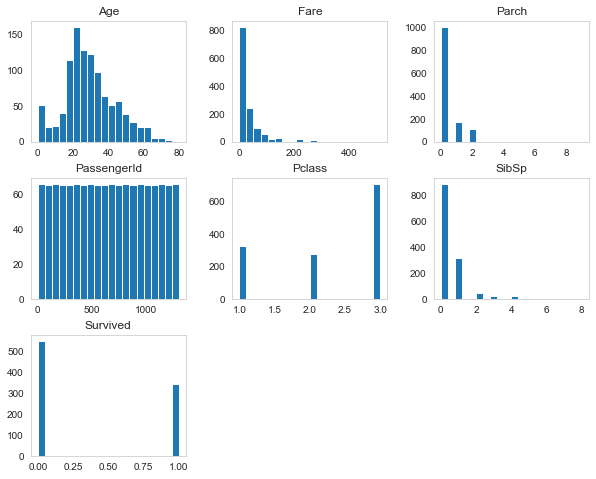

In [19]:
sns.set_style('whitegrid')
combined.hist(bins=20, figsize=(10,8), label='DataType', grid=False)

(figure out how to get the density plots) **************************************************

### Embarked box plot

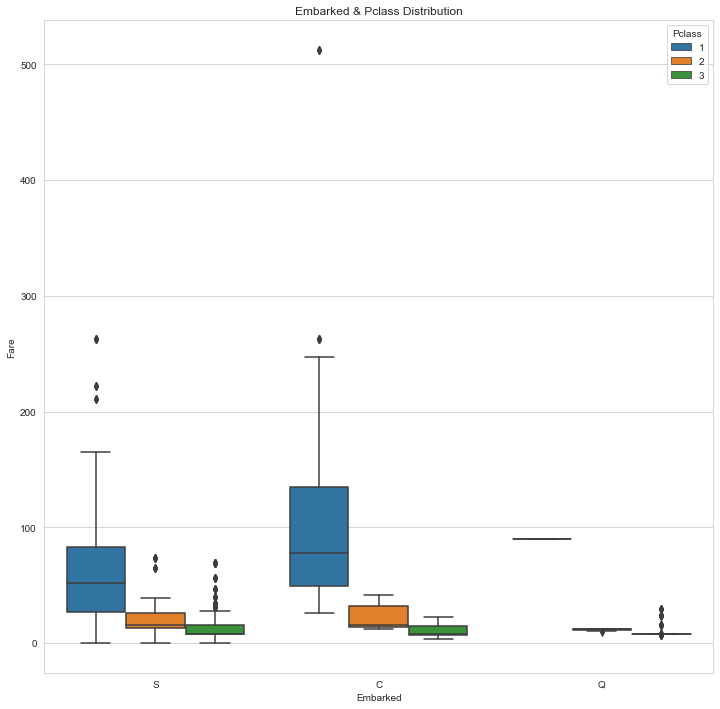

In [20]:
# Use either plt.figure() or plt.subplots()
fig, ax = plt.subplots(figsize=(12,12)) # ncols=1, nrows=1

# Step 2: Figure out what type of plots to use
ax1 = sns.boxplot(x='Embarked',
                  y='Fare',
                  hue='Pclass',
                  data=combined)
                  #ax=ax[0])

# Step3: Set any figure settings
ax1.set_title('Embarked & Pclass Distribution', fontsize=12)

'''Show figure'''
plt.show()

### Embarked count plot

Another plot that will show counts survival counts are greater than deaths in Cherbourg.

Some steps to get familiar with:
1. Create any argument dictionaries/lists like colors
2. Set grid/plot style using sns.set()
3. Set figure size if needed
4. Create figure using plt functions or base functions
5. Adjust any plot features like title, xlabel, ylabel, legend

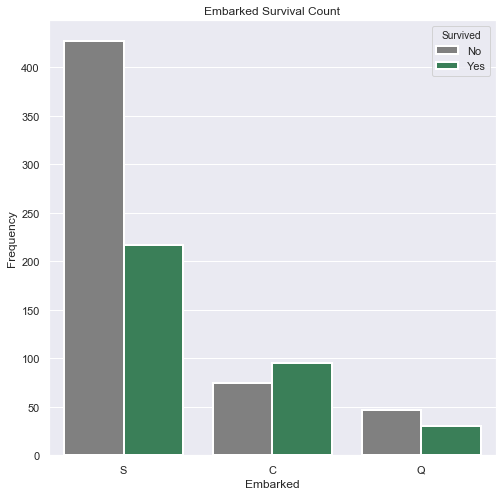

In [21]:
# Create color palette
colors = {1:'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Set figure size
fig = plt.figure(figsize=(8,8)) # ncols=1, nrows=1

# Create countplot()
ax = sns.countplot(x='Embarked',
                  hue='Survived',
                  data=combined,
                  linewidth=2,
                  palette=colors)

# Set titles and labels
plt.title('Embarked Survival Count')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

# Add legend and set
legend = ax.get_legend()
legend.set_title('Survived')
legend_txt = legend.texts
legend_txt[0].set_text('No')
legend_txt[1].set_text('Yes')

### Defining functions that will plot a table and graph

Found this from eraaz1 kernel which is neat, still have trouble getting two plots to show.

In [22]:
def pct_bar_labels():
    '''
    Function to label on top of the bar plot of relative frequency
    '''
    # Set font size
    font_size=12
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency: (%)', fontsize=font_size)
    plt.xticks(rotation=0, fontsize=font_size)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=font_size, color='black')
        
#     # Second method
#     for p in ax1.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy() 
#         ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
def freq_table(var):
    '''
    Define global variables
    Create function that will populate a frequency table with %
    First get the counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100,2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Set figure
    fig_size=(15,8)
    font_size=12
    title_size=15
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels()
    plt.show()

### Use the new function to plot Embarked feature

Frequency of Embarked :


,Count,Percentage
S,914,69.82
C,272,20.78
Q,123,9.40


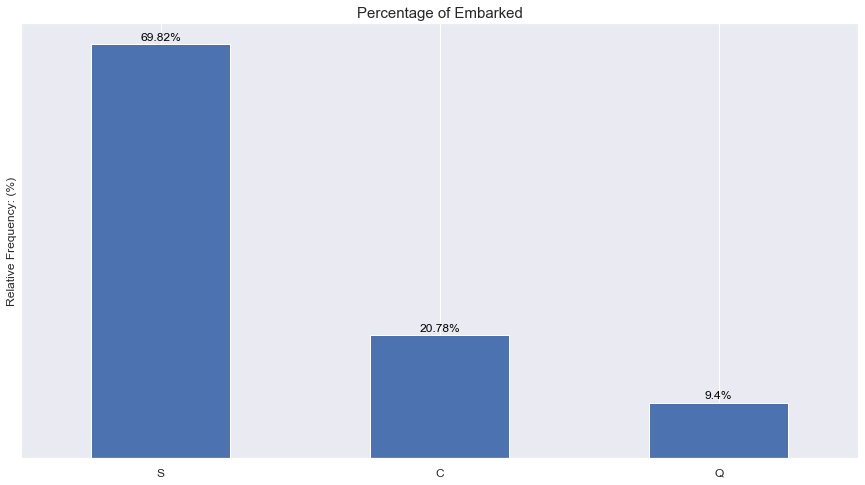

In [23]:
freq_table(combined.Embarked)

### Cabin feature

This is one feature that has a lot of nulls so we should take a look at it deeper to see what we can do with it.
1. How many nulls are there?
2. Can we infer anything from the feature?

In [24]:
# Get null count
cabin_freq = combined.Cabin.isnull().sum()

# Get proportion of null count
cabin_pct = round(combined.Cabin.isnull().sum()/len(combined)*100,2)

'''
Could also do a concat like this:

    cabin_freq.columns=['Frequency']
    cabin_pct.columns=['Percentage']

    pd.concat([cabin_freq, cabin_pct], axis=1)

Other tips: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
'''

# Create df
cabin_df = pd.DataFrame({'Nulls': cabin_freq,
                         'Percnt': cabin_pct},
                         columns=['Null Count', 'Percentage'],
                         index=[0])

# Print cabin_df type
print(type(cabin_df))

# Print output
cabin_df

<class 'pandas.core.frame.DataFrame'>


,Null Count,Percentage
0,NaN,NaN


In [25]:
print('Cabin Missing Values Proportion: ' + str(combined.Cabin.isnull().sum()/len(combined.Cabin)*100))

Cabin Missing Values Proportion: 77.46371275783041


Getting NaN values above so I need to look into that. The Cabin feature has a lot of null values the first thought for me is to remove it but there can always be something useful that is not shown.

- We can either not use this feature at all
- Discover methods to utilize feature engineering to make it usable
- Ask questions like:
    - Why are there so many missing Cabin values?
    - Survival rate of people with Cabins?
    - Socioeconomic status of Cabins?
    - Cabins closest to lifeboats?

We can see if we can group the fares with the cabin's letter.

In [26]:
# First we have to fill in the missing values so we don't get a subscriptable error
combined.Cabin.fillna('N', inplace=True)

# Loop through every row
combined['CabinValue'] = [i[0] for i in combined.Cabin]
combined.CabinValue[0:5]

0    N
1    C
2    N
3    C
4    N
Name: CabinValue, dtype: object

In [27]:
# Summarize cabin counts
combined.groupby('CabinValue').size().sort_values(ascending=False) # groupby()'s equivalent for value_counts()

CabinValue
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
dtype: int64

In [28]:
# Average fare per cabin letter
cvfare = combined.groupby('CabinValue')['Fare'].mean().sort_values(ascending=False)

cvfare_df = pd.DataFrame(cvfare)

# cvfare_df.reset_index(inplace=True)
# cvfare_df.set_index('CabinValue', drop=False, inplace=True)

cvfare_df

,Fare
CabinValue,
B,122.383078
C,107.926598
E,54.564634
D,53.007339
A,41.244314
T,35.500000
N,19.132707
F,18.079367
G,14.205000


In [29]:
# Group it alongside with Survived
combined[['CabinValue', 'Survived']].groupby(['CabinValue']).mean().sort_values(ascending=False, by='Survived')

,Survived
CabinValue,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
N,0.299854
T,0.000000


In [30]:
combined.head()

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
0,22.0,N,Train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,N
1,38.0,C85,Train,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,N,Train,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,N
3,35.0,C123,Train,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,N,Train,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,N


Surprisingly the survival rate isnt as correlated with the fares as I thought. C has a pretty high rate but only 59% survived. B has an abnormally high average fare too and it has a high survival rate which makse sense. The next bests are E and D which have a little over 53 in fares before it takes another small dip. We can attempt a statistical method to see if there is a relevancy between the two features. 

In [31]:
# Data is still in order here...
combined.head()

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
0,22.0,N,Train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,N
1,38.0,C85,Train,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,N,Train,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,N
3,35.0,C123,Train,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,N,Train,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,N


### Plot cabin value

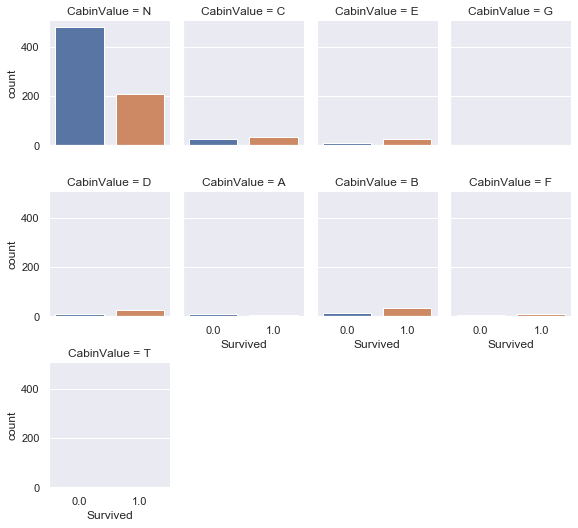

In [32]:
sns.catplot('Survived',
            col='CabinValue',
            col_wrap=4,
            data=combined[combined.CabinValue.notnull()],
            kind="count", height=2.5, aspect=.8)


### Create boxplots to see classes per cabin

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


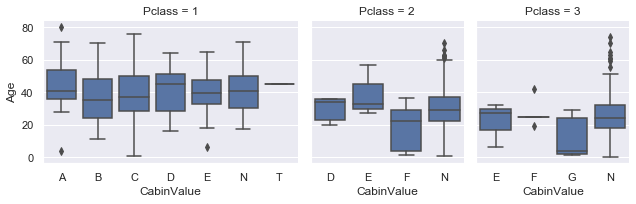

In [33]:
# Sort cabin values
combined_sorted = combined.assign(CabinValue=combined.CabinValue.astype(object)).sort_values('CabinValue')

# Create a facet grid
ax = sns.FacetGrid(combined_sorted,
                   col="Pclass",
                   sharex=False,
                   gridspec_kws={"width_ratios": [5, 3, 3]})

# Create boxplot
ax.map(sns.boxplot, "CabinValue", "Age")

Pclass definitely has more cabin options and the mean ages are higher as well.

### Some statistical tests

#### T-test
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

- Calculate the T-test for the means of two independent samples of scores.
- We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
- Ex: stats.ttest_ind(rvs1,rvs2, equal_var = False)

#### ANOVA
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
- If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) although with some loss of power.
- Ex: stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

#### Linear regression
This test works as well and is a lot easier to implement.

Fare = dependent variable (numerical)

CabinValue = independent variable (categorical)

In [34]:
# Breaks here
combined.head()

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
0,22.0,N,Train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,N
1,38.0,C85,Train,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,N,Train,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,N
3,35.0,C123,Train,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,N,Train,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,N


In [35]:
# Import the test method from scipy
import scipy.stats as stats

# Average fare per cabin letter
cv_data = combined.CabinValue
fare_data = combined.Fare

# Group fare data by cabin value
cvfare_df = pd.DataFrame({"CabinValue":cv_data, "Fare":fare_data})
groups = cvfare_df.groupby("CabinValue").groups
groups

# Extract individual groups
B_grp = fare_data[groups['B']]
C_grp = fare_data[groups['C']]
E_grp = fare_data[groups['E']]
D_grp = fare_data[groups['D']]
A_grp = fare_data[groups['A']]
T_grp = fare_data[groups['T']]
N_grp = fare_data[groups['N']]
F_grp = fare_data[groups['F']]
G_grp = fare_data[groups['G']]

# ANOVA
stats.f_oneway(B_grp, C_grp, E_grp, D_grp, A_grp, T_grp, N_grp, F_grp, G_grp)

F_onewayResult(statistic=nan, pvalue=nan)

Well, looks like my statistical analysis needs some reviewing... let's try a linear regression.

In [36]:
# Breaks here
combined.head()

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
0,22.0,N,Train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,N
1,38.0,C85,Train,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,N,Train,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,N
3,35.0,C123,Train,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,N,Train,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,N


In [37]:
# Import model and perform linear regression
'''
With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) 
as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. 

Get new dataframe without the null value: combined[combined['Fare'].notnull()].Fare.isnull().sum()
'''

from sklearn.linear_model import LinearRegression

# Drop NA fare
cv_fare_combined = combined[combined['Fare'].notnull()]

# Get x and y variables
fare_y = pd.DataFrame(cv_fare_combined.Fare, columns=['Fare'])
cv_x = cv_fare_combined.CabinValue
cv_x = pd.DataFrame((i for i in cv_x), columns=['CabinVal'])
cv_x_copy = cv_x.copy()

# Get dummies
cv_x = pd.get_dummies(cv_x, columns=['CabinVal'])
                                           
# Fit and score the model
lm = LinearRegression().fit(cv_x, fare_y)
lm_score = lm.score(cv_x, fare_y)

# Print coefficients
print('Linear Regression Score: ' + str(lm_score))
print('Intercept: ' + str(lm.intercept_))
print('Coefficient: ' + str(lm.coef_))

Linear Regression Score: 0.36704455147123405
Intercept: [8.64005398e+14]
Coefficient: [[-8.64005398e+14 -8.64005398e+14 -8.64005398e+14 -8.64005398e+14
  -8.64005398e+14 -8.64005398e+14 -8.64005398e+14 -8.64005398e+14
  -8.64005398e+14]]


It looks like there isn't a strong association between the fare feature and the cabin feature.

In [38]:
# Get count of a dataframe column
cv_x_copy['CabinVal'].value_counts()

# Print data info
print(type(cv_x))
print(type(fare_y))
print(type(cv_x.info()))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 9 columns):
CabinVal_A    1308 non-null uint8
CabinVal_B    1308 non-null uint8
CabinVal_C    1308 non-null uint8
CabinVal_D    1308 non-null uint8
CabinVal_E    1308 non-null uint8
CabinVal_F    1308 non-null uint8
CabinVal_G    1308 non-null uint8
CabinVal_N    1308 non-null uint8
CabinVal_T    1308 non-null uint8
dtypes: uint8(9)
memory usage: 11.6 KB
<class 'NoneType'>


Let's look at the median values instead of the mean since there might be skewness involved.

In [39]:
combined.groupby('CabinValue')['Fare'].median().sort_values(ascending=False)

CabinValue
C    86.2896
B    82.2667
E    53.1000
D    52.5542
T    35.5000
A    35.0771
G    16.7000
F    13.0000
N    10.5000
Name: Fare, dtype: float64

In [40]:
# Create a function to group cabins
def cabin_grouping(x):
    letter = 0
    if x<16:
        letter='G'
    elif x>=16 and x<26:
        letter='F'
    elif x>=27 and x<38:
        letter='T'
    elif x>=38 and x<47:
        letter='A'
    elif x>=47 and x<53:
        letter='E'
    elif x>=53 and x<54:
        letter='D'
    elif x>=54 and x<116:
        letter='C'
    else:
        letter='B'
    return letter

In [41]:
# Apply the cabin function into each unknown cabins
combined['CabinValue'] = combined.Fare.map(lambda x:cabin_grouping(x))
combined.drop('Cabin', axis=1, inplace=True)

combined.shape

(1309, 13)

### Fare feature

There is one null value.

In [42]:
combined[combined.isnull().Fare]

,Age,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
152,60.5,Test,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,B


We can do a dirty method and just add in an average failure for the passenger type based on cabin, age, sex, etc.

In [43]:
# Get attributes and index the values to get the mean
missing_fare = round(combined[(combined.Pclass==3) & (combined.Embarked=='S') & (combined.Sex=='male')].Fare.mean(),2)
print('Avg Fare for Pclass = 3, Embarked = S, Sex = M: ' + str(missing_fare))

# Replace null fare
combined.Fare.fillna(missing_fare, inplace=True)

Avg Fare for Pclass = 3, Embarked = S, Sex = M: 13.15


### Fare - jitter

Text(0.5, 1.0, 'Fare Distribution vs. Pclass')

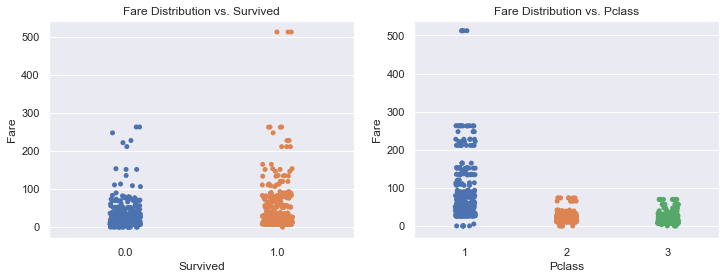

In [44]:
# Create figure space
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

ax1 = sns.stripplot(x="Survived",
                    y="Fare",
                    data=combined,
                    jitter=True,
                    ax=ax[0])

ax2 = sns.stripplot(x="Pclass",
                    y="Fare",
                    data=combined,
                    jitter=True,
                    ax=ax[1])

# Set figure features
ax1.set_title('Fare Distribution vs. Survived')
ax2.set_title('Fare Distribution vs. Pclass')

Looks like there are a few fare outliers that can skew the data. We will most likely standardized the entire dataset before modeling.

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


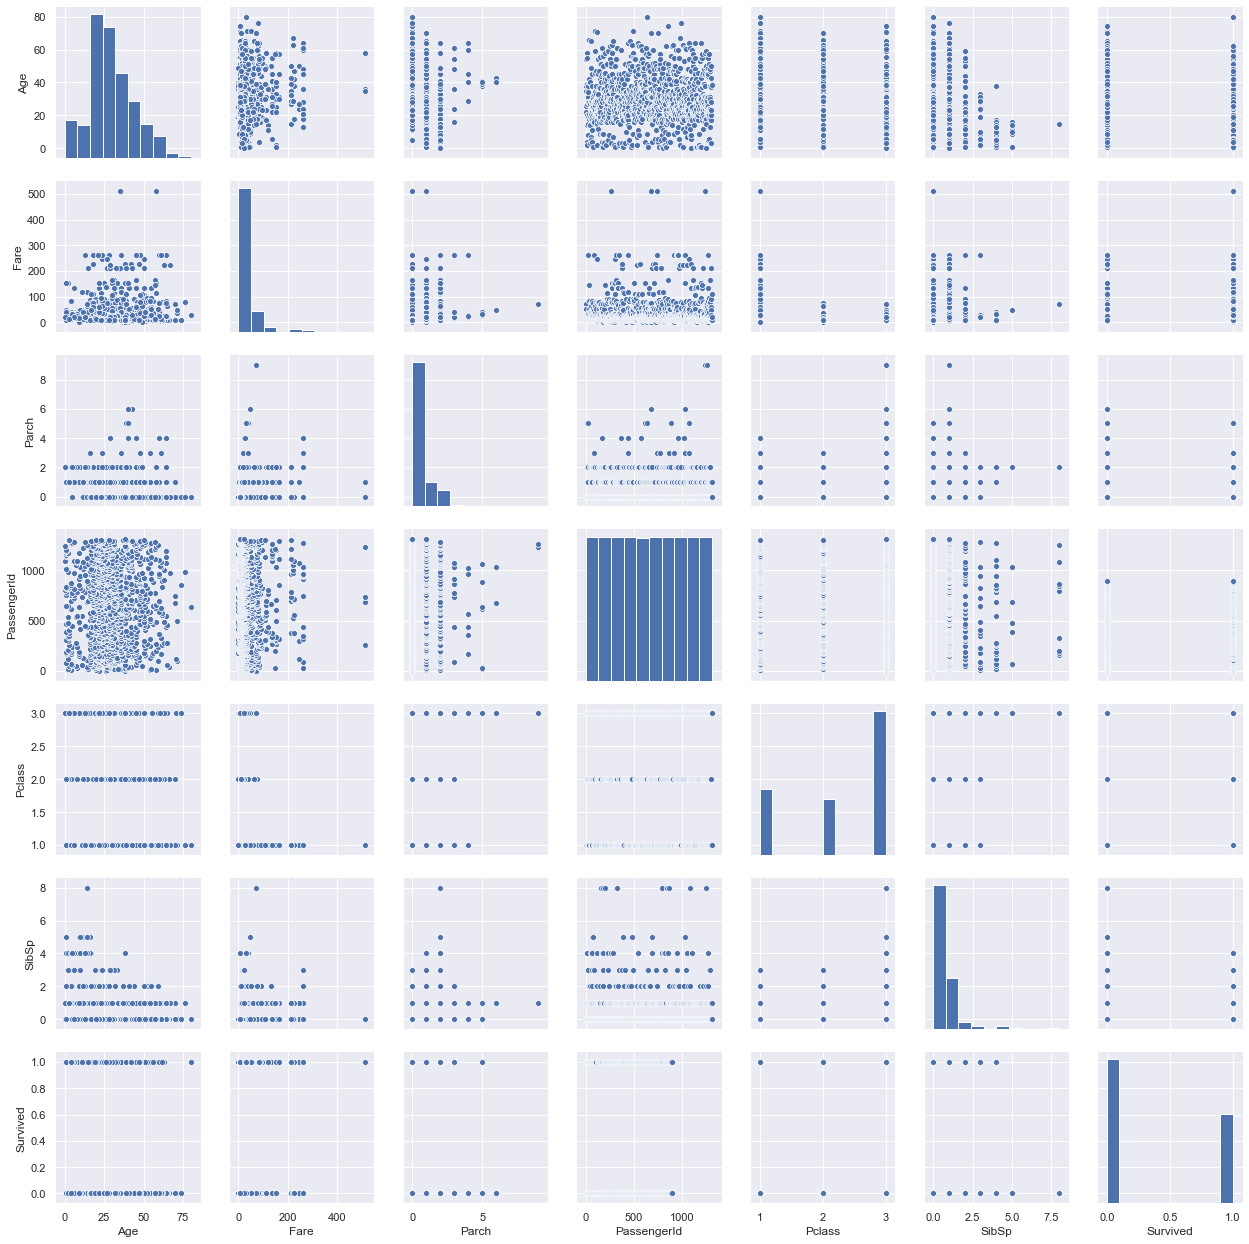

In [45]:
# This will take awhile to load up if the dataset is large
sns.pairplot(combined) # ggpairs() in R

Text(0.5, 1.0, 'Survived vs. Fare BoxPlot')

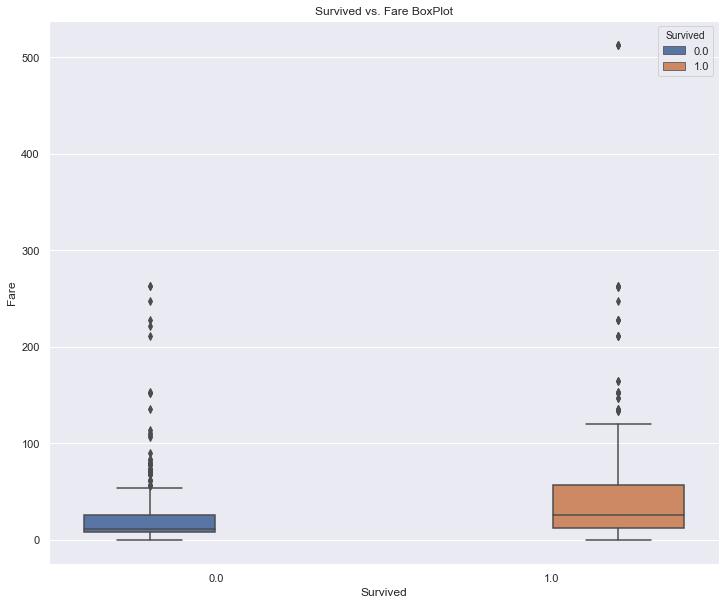

In [46]:
# A boxplot would be able to see where the quartiles end
fig = plt.figure(figsize=(12,10))

# Create boxplot
ax = sns.boxplot(x='Survived',
                 y='Fare',
                 hue='Survived',
                 data=combined)

# Set figure features
ax.set_title('Survived vs. Fare BoxPlot')

The mean is higher when the fare is higher in survival rates. There could be information on whether a higher fare price may affect the chance of survival especially with special titles.

### Create a density plot for Fare & Survived

Text(0, 0.5, 'Fare')

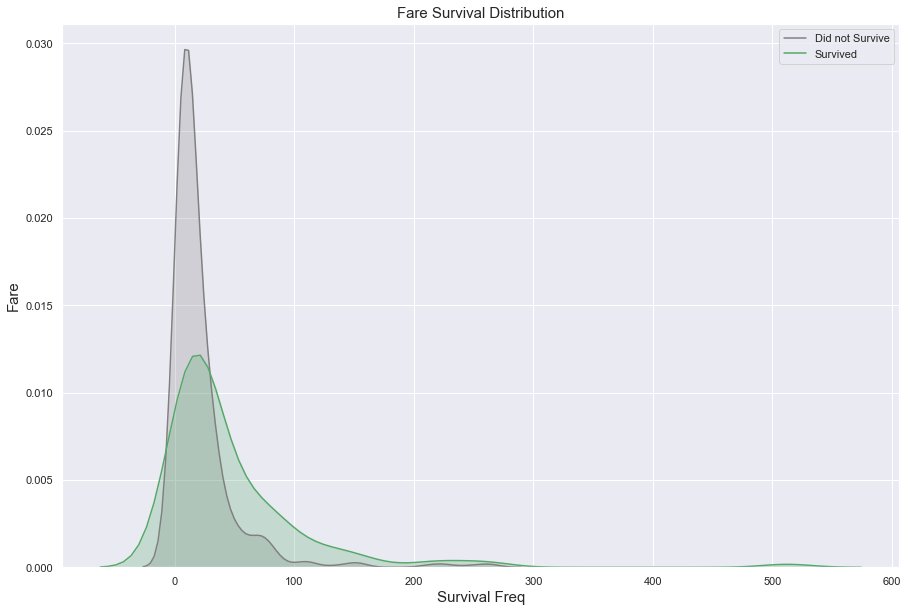

In [47]:
# Create a figure space, only need 1 we will overlap the densities
fig = plt.figure(figsize=(15,10))

# Create the density plots
ax = sns.kdeplot(combined.loc[(combined.Survived==0), 'Fare'],
#                  combined.Fare[combined.Survived==0],
                 color='gray',
                 shade=True,
                 label='Did not Survive'
                )

ax = sns.kdeplot(combined.loc[(combined.Survived==1), 'Fare'],
                 color='g',
                 shade=True,
                 label='Survived')

# Set plot features
plt.title('Fare Survival Distribution', fontsize=15)
plt.xlabel('Survival Freq', fontsize=15)
plt.ylabel('Fare', fontsize=15)

The plot also shows a similar spike like the lower class survival rate where the gray area is way above the shaded green region.

Looking proportionally, if you paid a good amount compared to the mean/median rate, you had a better chance of surviving.

7/9 people survived when the fare was 250.01 and above. After looking at these 9 people, the Fortune family may have held high socio-economic status as they were all in this fare range. The males died unfortunately, either saving their sisters or was just in the wrong area at the wrong time. 

In [48]:
# Get fare outliers
combined[combined.Fare>300]

,Age,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
258,35.0,Train,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,B
679,36.0,Train,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,B
737,35.0,Train,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,B
343,58.0,Test,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,B


### Plot without Fares < 150

This will help us see the distribution better.

Text(0, 0.5, 'ylabel')

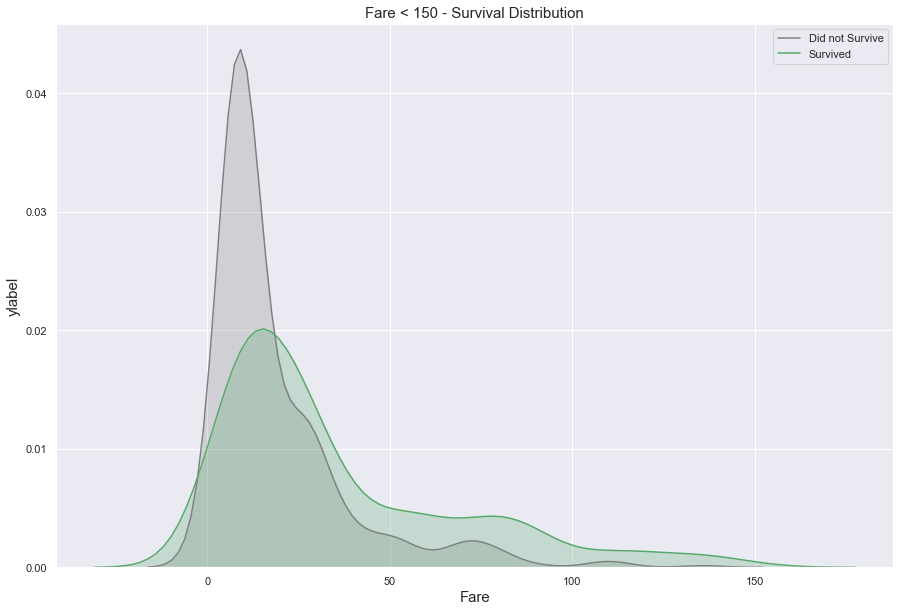

In [49]:
# Create figure space
fig = plt.figure(figsize=(15,10))

# Create kdeplots
ax = sns.kdeplot(combined.loc[((combined.Survived==0) & (combined.Fare<150)), 'Fare'],
                 color='gray',
                 shade=True,
                 label='Did not Survive'
                )

# Be sure to put parentheses; loc(row values, column name)
ax = sns.kdeplot(combined.loc[((combined.Survived==1) & (combined.Fare<150)), 'Fare'],
                 color='g',
                 shade=True,
                 label='Survived'
                )

# Set plot features
plt.title('Fare < 150 - Survival Distribution', fontsize=15)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('ylabel', fontsize=15)

### Age Feature

Our final feature that has NA values besides Survived (test data). Let's see how many there are.

In [50]:
# Print out the missing values
print('Missing values in the age feature: ' + str(round(combined.Age.isnull().sum()/len(combined)*100,1)) + str('%'))

Missing values in the age feature: 20.1%


Replacing it with a summary statistics may not be useful because age could determine the survival rate. Kids and older people have higher chance of survival. We could attempt to use an algorithm to see if we can model something for this feature instead. First let's plot some graphs to see how the distribution looks like for age.

Create multiple boxplots for Age.

Text(0.5, 1.0, 'Cabin vs. Age for Survival Rate')

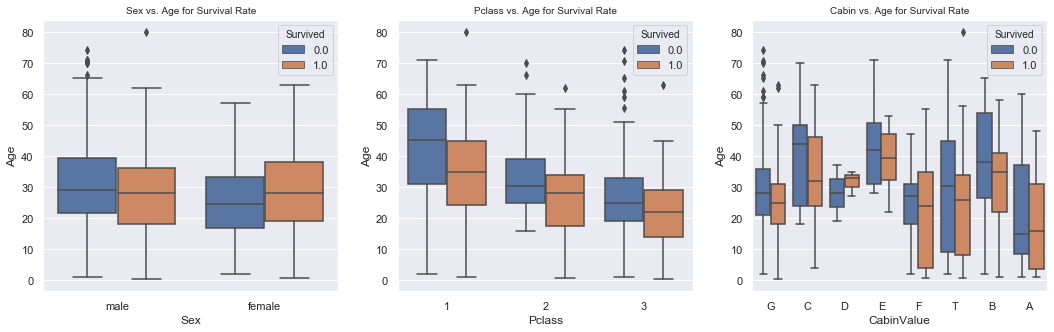

In [51]:
fig, ax = plt.subplots(figsize=(18,5), ncols=3, nrows=1)

# Create plots
ax1 = sns.boxplot(x='Sex', y='Age', hue='Survived', data=combined, ax=ax[0])
ax2 = sns.boxplot(x='Pclass', y='Age', hue='Survived', data=combined, ax=ax[1])
ax3 = sns.boxplot(x='CabinValue', y='Age', hue='Survived', data=combined, ax=ax[2])

# Set plot features
ax1.set_title('Sex vs. Age for Survival Rate', fontsize=10)
ax2.set_title('Pclass vs. Age for Survival Rate', fontsize=10)
ax3.set_title('Cabin vs. Age for Survival Rate', fontsize=10)

Based on these three plots and some inferences made from my previous work on this dataset...

These following groups have a higher survival rate than normal:
- Female
- Kids
- Older Adults
- Higher socioeconomic status people (high fares, good cabins, pclass, etc.)
- More to come such as titles, family size, child groups

Text(0, 0.5, 'Survival Frequency')

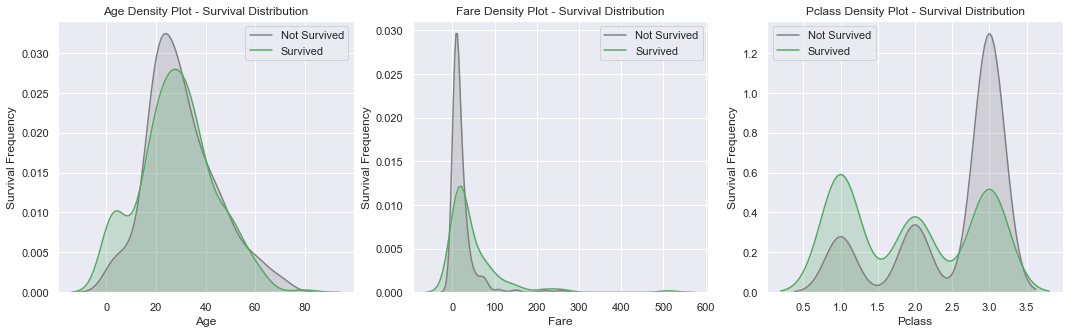

In [52]:
fig, ax = plt.subplots(figsize=(18,5), ncols=3, nrows=1)

# Check NA: combined.Age[combined.Age.notnull() & combined.Survived==1].isnull().sum()
ax1 = sns.kdeplot(combined.Age[(combined.Age.notnull()) & (combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[0])

ax1 = sns.kdeplot(combined.Age[(combined.Age.notnull()) & (combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[0])

ax2 = sns.kdeplot(combined.Fare[(combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[1])

ax2 = sns.kdeplot(combined.Fare[(combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[1])

ax3 = sns.kdeplot(combined.Pclass[(combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[2])

ax3 = sns.kdeplot(combined.Pclass[(combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[2])

# Set plot features (axes has to use .set_xlabel() instead of plt.xlabel())
ax1.set_title('Age Density Plot - Survival Distribution', fontsize=12)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Survival Frequency', fontsize=12)

ax2.set_title('Fare Density Plot - Survival Distribution', fontsize=12)
ax2.set_xlabel('Fare', fontsize=12)
ax2.set_ylabel('Survival Frequency', fontsize=12)

ax3.set_title('Pclass Density Plot - Survival Distribution', fontsize=12)
ax3.set_xlabel('Pclass', fontsize=12)
ax3.set_ylabel('Survival Frequency', fontsize=12)

It looks like almost no age group besides children and infants survived more than death. We can assume that this group was a priority to get to safety and can also fit more into a lifeboat due to their size. 

Try to get the NA values out below. Fixed with parentheses. Was not getting the data before.

combined.Age[(combined.Age.notnull()) & (combined.Survived==0)].isnull().sum()

### Faceted histogram plots by Sex and Age

The idea of faceted plots is to visualize multiple variables and relationships at the same time. 

Create faceted barplots with the sex and age Features. In R, this could be done by using ggplot() and facet_grid(~Var) or in python with sns.FacetGrid() 

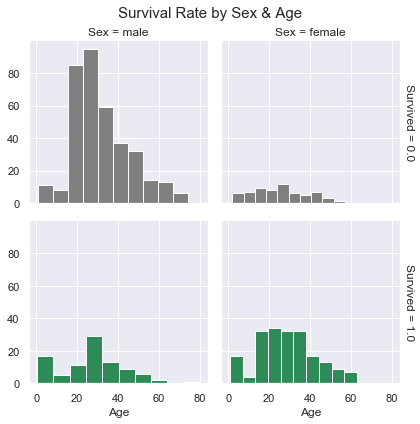

In [53]:
# Get colors for palette
colors = {1: 'seagreen', 0: 'gray'}

# Create facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   row='Survived',
                   margin_titles=True,
                   hue='Survived',
                   palette=colors)

# Create plot using map()
ax = ax.map(plt.hist, 'Age', edgecolor='w')

# Set plot features
ax.fig.suptitle('Survival Rate by Sex & Age', size=15)
plt.subplots_adjust(top=0.90)

### Create a jitter plot on top of a box plot for Age

Text(0.5, 1.0, 'Survival Distribution by Age')

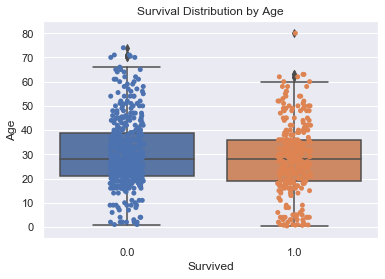

In [54]:
ax = sns.boxplot(x='Survived',
                 y='Age',
                 data=combined)

ax = sns.stripplot(x='Survived',
                   y='Age',
                   data=combined,
                   jitter=True,
                   edgecolor='w')

plt.title('Survival Distribution by Age', fontsize=12)

There is a slight indication from the chart showing that younger people has a higher chance of survival.

### Create a plot for Age distribution

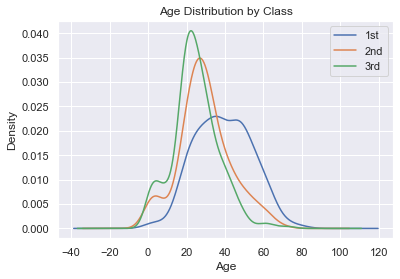

In [55]:
combined.Age[combined.Pclass==1].plot(kind='kde')
combined.Age[combined.Pclass==2].plot(kind='kde')
combined.Age[combined.Pclass==3].plot(kind='kde')

# Set plot features
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution by Class', fontsize=12)
plt.legend(('1st', '2nd', '3rd'), loc='best')

By looking at this plot we can assume that wealthier people tend to have a larger population boarding the ship. The younger has a strong unimodel shape peaking at around 20s and 30s.

### Sex feature

I believe this feature without any feature engineering would be the best feature to determine survival rate since it looks like females have a higher rate in general.

<Figure size 864x432 with 0 Axes>

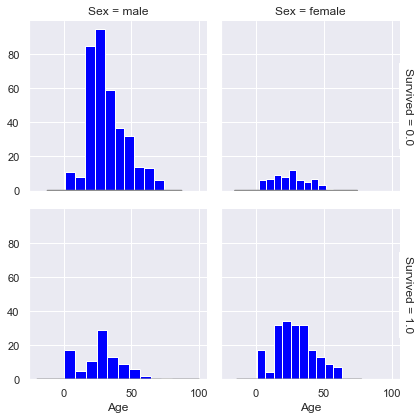

In [56]:
# Set figure space
fig = plt.figure(figsize=(12,6))

# Create facet plot
ax = sns.FacetGrid(combined,
                   col='Sex',
                   row='Survived',
                   margin_titles=True)

# Create plot and plot features
ax.map(plt.hist, 'Age', color='blue')
ax.map(sns.kdeplot, 'Age', color='gray', shade=False)

As expected, males have a higher death rate just by looking at the top graphs. But just to be sure that it's not confirmation bias, continue to see different views of the data.

Text(0.5, 0.98, 'Gender & Age - Survival Distribution')

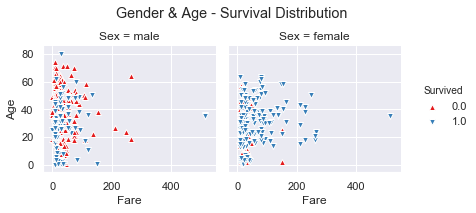

In [57]:
# Set figure space
# fig = plt.subplots(figsize=(12,8))

# Set facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   hue='Survived',
                   margin_titles=True,
                   palette='Set1',
                   hue_kws=dict(marker=["^", "v"]))

# Create plots
ax.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()
plt.subplots_adjust(top=0.80)
ax.fig.suptitle('Gender & Age - Survival Distribution')

Those fare outliers have been a couple together. Earlier the boxplots would show the points but we can safely assume so unless they were family.

In [58]:
# Create a gender/survival frequency distribution table
sex_survived = pd.crosstab(index=combined['Survived'],
                           columns=combined['Sex'],
                           margins=True)

sex_survived.index = ['Did not Survive', 'Survived', 'ColTotal']
sex_survived.columns = ['F', 'M', 'RowTotal']

# Distribution for total
print(round(sex_survived/sex_survived.loc['ColTotal', 'RowTotal']*100,1))

# Distribution for gender
round(sex_survived/sex_survived.loc['ColTotal']*100,1)

                    F     M  RowTotal
Did not Survive   9.1  52.5      61.6
Survived         26.2  12.2      38.4
ColTotal         35.2  64.8     100.0


,F,M,RowTotal
Did not Survive,25.8,81.1,61.6
Survived,74.2,18.9,38.4
ColTotal,100.0,100.0,100.0


(Survived - Females) is the the second highest combination of the two features right after (Did not Survive - Males). There is also an inverse relation to the proportion as well as most females survived but most males did not survive. Most males died but most females survived.

### Sex Bar Plot

Frequency of Sex :


,Count,Percentage
male,843,64.4
female,466,35.6


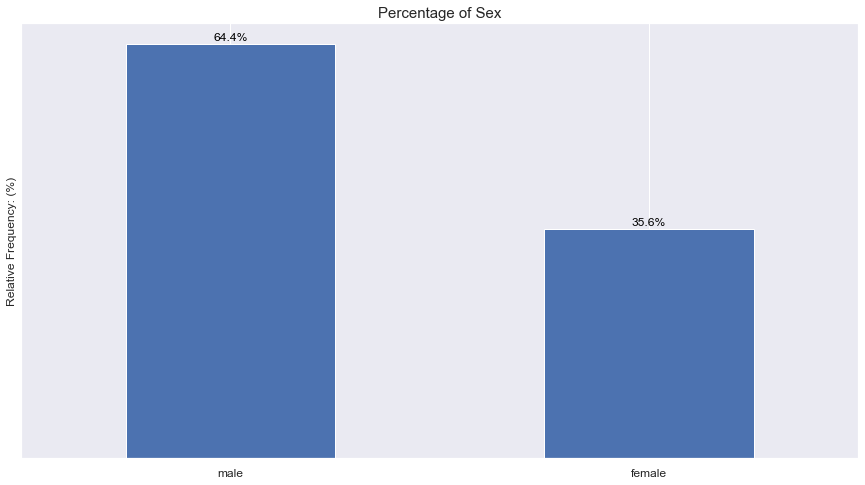

In [59]:
# Using the function created earlier, create a quick visual
freq_table(combined.Sex)

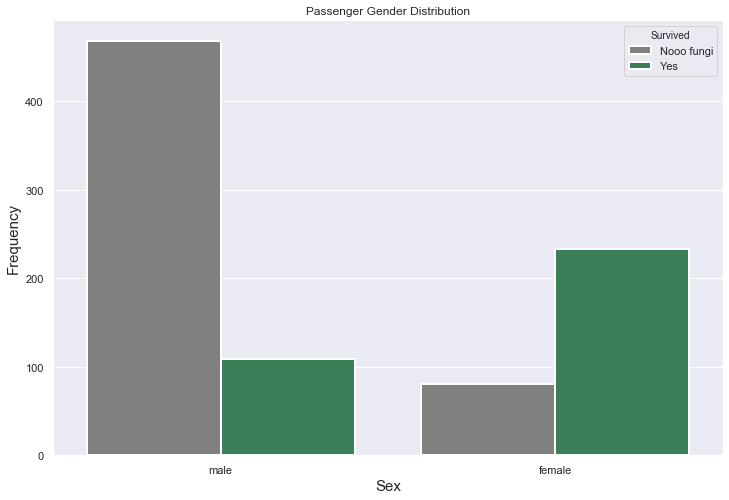

In [60]:
# Let's break it down
colors = {1: 'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Create figure space
plt.subplots(figsize=(12,8))

# Create countplot(); does not need a y variable since it's counting
ax = sns.countplot(x='Sex',
                   hue='Survived',
                   data=combined,
                   linewidth=2,
                   palette=colors)

# Set plot features (plt.title vs. ax.set_title)
ax.set_title('Passenger Gender Distribution')
ax.set_xlabel('Sex', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

# Add legend and rename text
ax_legend = ax.get_legend()
ax_legend.set_title('Survived')
ax_legend_text = ax_legend.texts
ax_legend_text[0].set_text('Nooo fungi')
ax_legend_text[1].set_text('Yes')

# Show
plt.show()

Again, as you can see from the plot above, females have a higher survival rate vs non-survival rate. If you're a female, your chances are going to be a lot higher than the males. Hopefully the model will catch this when we start using the features and plot variable importance

### Create a faceted plot with Embarked & Sex

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

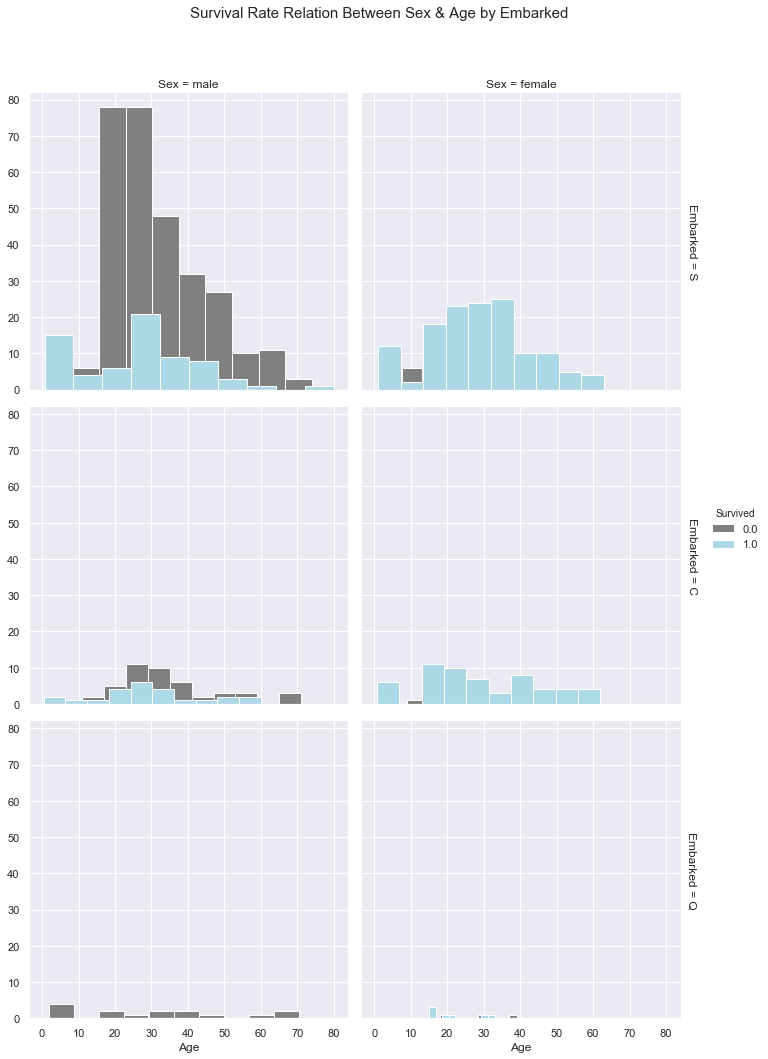

In [61]:
# Set colors
colors = {1: 'lightblue', 0: 'gray'}

# Create facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   row='Embarked',
                   height=5, 
                   margin_titles=True,
                   hue='Survived',
                   palette=colors)

# Use map() on the facet grid
ax = ax.map(plt.hist, 'Age', edgecolor='w')
ax_legend = ax.add_legend()
ax.set_titles("{col_name} Test")

# Set plot features
ax.fig.suptitle('Survival Rate Relation Between Sex & Age by Embarked', size=15)

# Move title
plt.subplots_adjust(top=0.90)

Another illustration between embarked locations with gender facets. Like we saw previously, females have a higher survival rate and it definitely shows here per location.

With that being said, what else can we see from these charts?
- We can also see that the location 'S' which is Southampton has majority of the passengers with the least being Queenstown (Q). 
- Unless we zoom into the chart for Queenstown, it looks like there were no male survivors.
- Cherbourg (C) has a high survival rate distribution according to the plot. 

### Scatterplot for Sex, Age & Fare

Let's use plt.scatter() to see individual points.

<Figure size 1080x720 with 0 Axes>

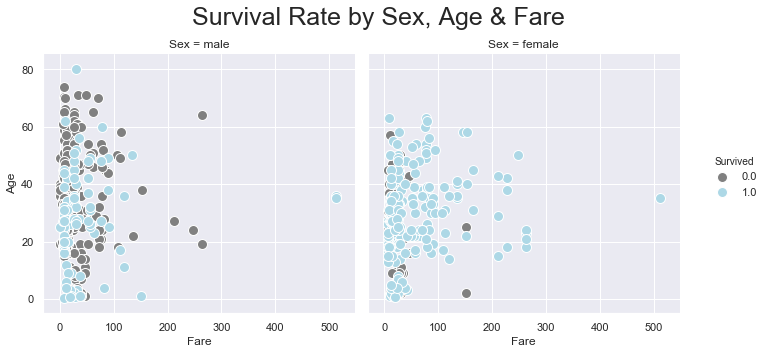

In [62]:
# Create a figure
fig = plt.figure(figsize=(15,10))

# Create facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   hue='Survived',
                   margin_titles=True,
                   palette=colors,
                   height=5) # insert arg value for sizes

# Create scatter
ax.map(plt.scatter, 'Fare', 'Age', edgecolor='w', s=100)

# Add a legend
ax.add_legend()

# Set plot features
ax.fig.suptitle('Survival Rate by Sex, Age & Fare', size=25)
plt.subplots_adjust(top=0.85)

Outliers could be seen with the points that are above 500. We can either plot without them to see the distribution better.

##### Some Steps to follow
1. Create figure space
2. Create facetGrid()
3. Create plot by plt.plot or snsplot()
4. Set titles, legends, etc.
    - Get familiar with the parameters
5. Show plot

### Pclass feature

An assumption would be that higher class passengers would have higher survival rates than lower classed passengers.

We can order and set colors for the bar plot as well. It's already ordered so we don't need to but if if there was a specific order then use the order parameter in sns.barplot(order=['',''])

([<matplotlib.axis.XTick at 0x14456d2f518>,
 <a list of 3 Text xticklabel objects>)

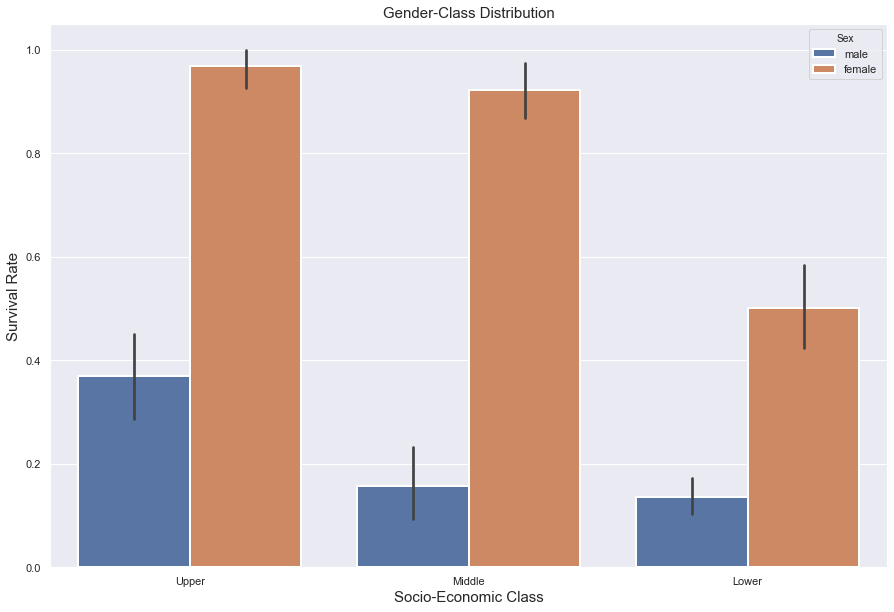

In [63]:
# Create figure space
plt.subplots(figsize=(15,10)) # plt.figure()

# Create colors
p_colors = {1: 'seagreen', 2: 'lightblue', 3: 'orange'}

# Create a bar plot
ax = sns.barplot(x='Pclass',
                 y='Survived',
                 hue='Sex',
                 data=combined,
#                  palette='Blues_d',
                 linewidth=2)
#                  order=['','','']

# Set plot features
ax.set_title('Gender-Class Distribution', fontsize=15)
ax.set_xlabel('Socio-Economic Class', fontsize=15)
ax.set_ylabel('Survival Rate', fontsize=15)

# Set xlabel values
labels = ['Upper', 'Middle', 'Lower']
val = [0,1,2]
plt.xticks(val, labels)

Plot should be faceted by Pclass when done correctly


c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


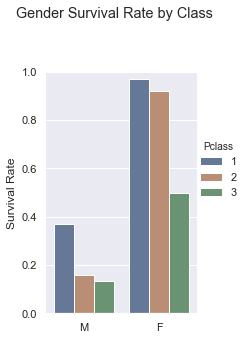

In [64]:
# Create a similar plot but have automated titles
ax = sns.catplot(x='Sex',
                 y='Survived',
                 hue='Pclass',
                 data=combined,
                 saturation=0.50,
                 kind='bar',
                 ci=None,
                 aspect=0.60)

# Set plot features
(ax.set_axis_labels('', 'Survival Rate')
    .set_xticklabels(['M','F'])
    .set_titles('{col_name} {col_var}')
    .set(ylim=(0, 1))
    .despine(left=True))

plt.subplots_adjust(top=0.80)
ax.fig.suptitle('Gender Survival Rate by Class')

print('Plot should be faceted by Pclass when done correctly')

Note: Using catplot() is safer than using FacetGrid() directly, as it ensure synchronization of variable order across facets

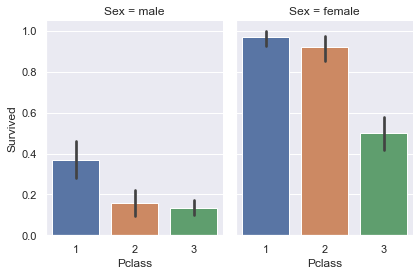

In [65]:
# Another type of plot
ax = sns.catplot(x='Pclass',
                 y='Survived',
                 col='Sex',
                 data=combined,
                 kind='bar',
                 height=4,
                 aspect=0.75)

The plot above indicates that if you are a female within Pclass of 1 or 2, the chance of survival is way above 80%. If you are in Pclass & a female, the chances of survival skyrockets close to 100%. Let's see this in a table if the plot is correct.

In [66]:
pclass_sex_survived = pd.crosstab(index=combined.Survived,
                                  columns=[combined.Pclass, combined.Sex],
                                  margins=True)

pclass_sex_survived.index = ['Did not Survive', 'Survived', 'ColTotal']

round(pclass_sex_survived/pclass_sex_survived.loc['ColTotal']*100,1)

Pclass               1             2             3           All
Sex             female   male female   male female   male       
Did not Survive    3.2   63.1    7.9   84.3   50.0   86.5   61.6
Survived          96.8   36.9   92.1   15.7   50.0   13.5   38.4
ColTotal         100.0  100.0  100.0  100.0  100.0  100.0  100.0

- 96.8% and 92.1% survival rates within that group.
- Highest death rate would be males in Pclass of 3 then Pclass of 2.

So another assumption would be that if you were a female in a high socio-economic status based on Pclass then your survival rate goes way up.

### Create a kernel density plot by Pclass & Sex

Parameters to use: data, color, shade, label

([<matplotlib.axis.XTick at 0x14456e58b70>,
 <a list of 3 Text xticklabel objects>)

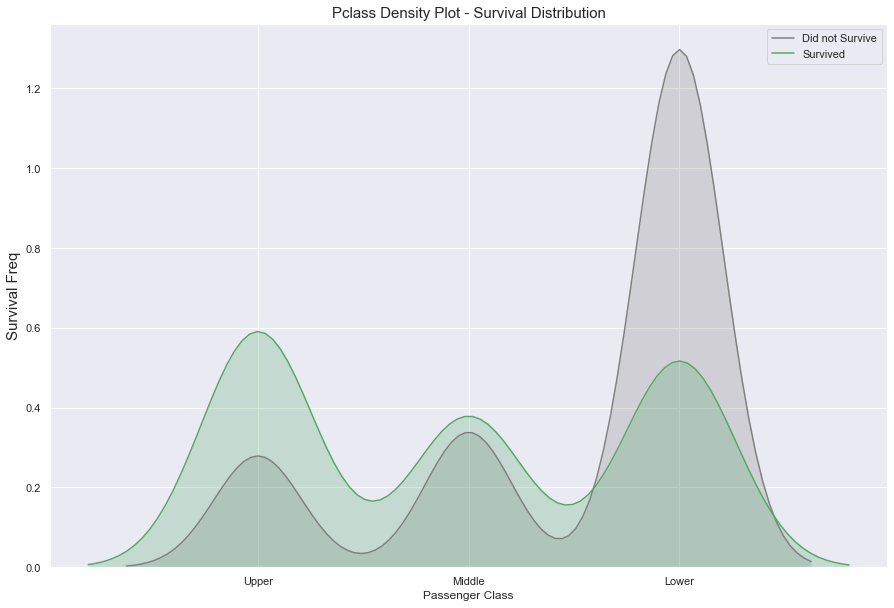

In [67]:
# Create a figure space
fig = plt.figure(figsize=(15,10))

# Create 2 kdeplots (one of each Survived group)
ax1 = sns.kdeplot(combined.Pclass[combined.Survived==0],
                  color='gray',
                  shade=True,
                  label='Did not Survive')

ax1 = sns.kdeplot(combined.Pclass[combined.Survived==1],
                  color='g',
                  shade=True,
                  label='Survived')

# Set plot features
ax1.set_title('Pclass Density Plot - Survival Distribution', fontsize=15)
ax1.set_xlabel('Passenger Class', fontsize=12)
ax1.set_ylabel('Survival Freq', fontsize=15)

# Set xtick labels
labels = ['Upper', 'Middle', 'Lower']
# plt.xticks(sorted(combined.Pclass.unique()), labels)
plt.xticks([1,2,3], labels)

Take a look at this and check out the difference between the top of the gray density shading vs the green shading. The difference is much higher in the Lower class vs. the Upper where it is actually negative or positive depending on how you see the graph.

### Parch feature

A larg parch size could mean no survival or less survival due to the fact that no one wants to be left behind. When members are within a vicinity or not, search can continue vs someone who may be alone or have just one person that they are alongside at most time so hopefully the escape process is a lot faster and more efficient. 

### Create a factor plot for Parch
The new catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables.

_________________________________ 

#### Notes - Tutorials

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/

- kind parameter argument values: point, bar, violin, box, boxen
- jitter parameter: numerical value ('0.25')

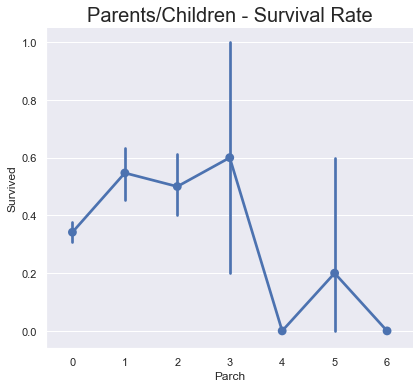

In [68]:
# Plot without high fare outliers
sns.catplot(x='Parch',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='point',
            height=6) 

# Set plot features
plt.title('Parents/Children - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Passengers who traveled in small groups with siblings/spouses had higher survival rates than other passengers as shown in the plot above. There is a decline as the numbers get higher after 1 sibling/spouse.

What can be inferred from this?
- Movement to safety is a lot easier when there are less people
- Larger groups tend to try to do initial search for their family members/loved ones longer than smaller groups
- The longer you wait the higher chance of death (waiting = search, waiting)

Catplot also have other plot shapes as well, try them out.

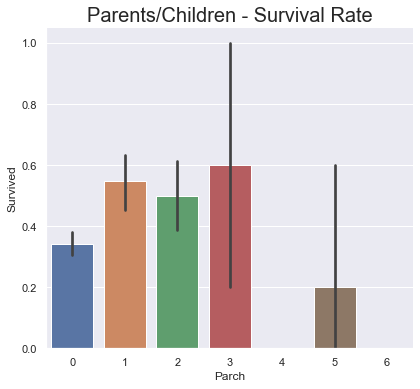

In [69]:
# Plot without high fare outliers
sns.catplot(x='Parch',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='bar',
            height=6) 

# Set plot features
plt.title('Parents/Children - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

### Create a factor plot for SibSP

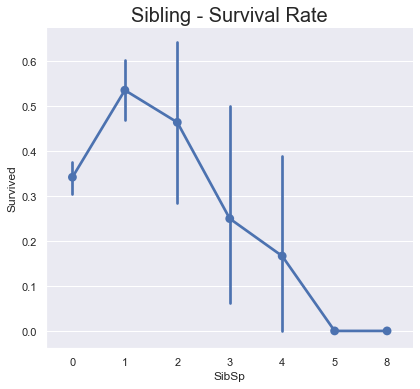

In [70]:
sns.catplot(x='SibSp',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='point',
            height=6)

# Set plot features
plt.title('Sibling - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Plot shows a similar shape like the Parch feature. The higher the number usually indicates a lower survival rate.

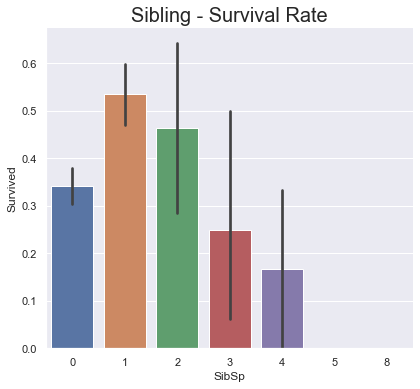

In [71]:
sns.catplot(x='SibSp',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='bar',
            height=6) 

# Set plot features
plt.title('Sibling - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

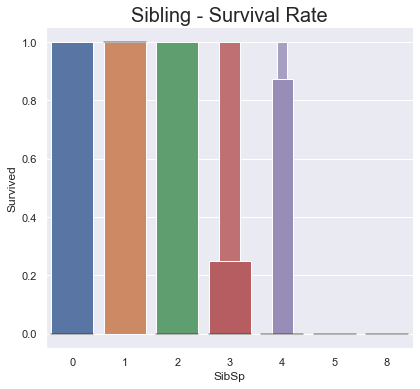

In [72]:
sns.catplot(x='SibSp',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='boxen',
            height=6) 

# Set plot features
plt.title('Sibling - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Now that we have a better idea of the distributions of the passengers, we can work on some feature engineering to help the model and clean up any other features like Age.

### Let's create a new feature from Sex called Gender to be numerical

In [73]:
combined['Gender'] = combined.Sex.map(lambda x: 0 if x=='female' else 1)

# Check
combined.Gender.head()

0    1
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

### name_length, length_group new features

Create a new feature called name_length that will count the letters in each name. As stated in my previous work, this is a new one to me when going through kernels. I definitely want to see the feature importance on this one. 

Loop through the Name feature and create a length_group feature based on the count.

In [74]:
# Loop through each index position in the name and sum
combined['name_length'] = [len(i) for i in combined.Name]

# Define a new function to group the name length
def create_name_length_group(size):
    term=''
    if size<20:
        term='short'
    elif size<=35:
        term='medium'
    elif size<=45:
        term='good'
    else:
        term='long'
    return term

# Map the new function to create a new length_group feature
combined['length_group'] = combined.name_length.map(create_name_length_group)

# Check: get multiple column names by using double [[name, name]]
combined[['name_length', 'length_group']].head()

,name_length,length_group
0,23,medium
1,51,long
2,22,medium
3,44,good
4,24,medium


### Create a factor plot of length_group

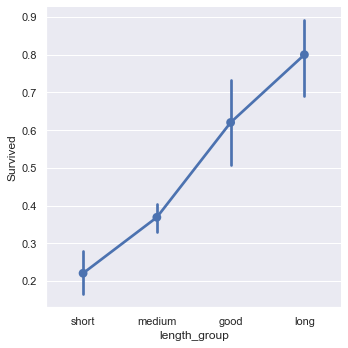

In [75]:
sns.catplot(x='length_group',
            y='Survived',
            data=combined,
            kind='point',
            order=['short', 'medium', 'good', 'long'])

If this is actually true, the longer name you have, the higher chance of survival. What if we decide to group females, pclass, and length_group features together?

In [76]:
pclass_sex_length_survived = pd.crosstab(index=combined.Survived,
                                  columns=[combined.Pclass, combined.Sex, combined.length_group],
                                  margins=True)

pclass_sex_length_survived.index = ['Did not Survive', 'Survived', 'ColTotal']

round(pclass_sex_length_survived/pclass_sex_length_survived.loc['ColTotal']*100,1)

Pclass               1                                                2  \
Sex             female                        male               female   
length_group      good   long medium  short   good medium  short   good   
Did not Survive    0.0    4.2    4.3    0.0   37.5   62.1   78.9   16.7   
Survived         100.0   95.8   95.7  100.0   62.5   37.9   21.1   83.3   
ColTotal         100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   

Pclass                         ...             3                              \
Sex                            ...   male female                        male   
length_group      long medium  ...  short   good   long medium  short   good   
Did not Survive    9.1    2.9  ...   90.5   66.7   47.1   46.0   52.6   66.7   
Survived          90.9   97.1  ...    9.5   33.3   52.9   54.0   47.4   33.3   
ColTotal         100.0  100.0  ...  100.0  100.0  100.0  100.0  100.0  100.0   

Pclass                                  All  
Sex                                          
length_group      long medium  short         
Did not Survive    0.0   87.0   88.4   61.6  
Survived         100.0   13.0   11.6   38.4  
ColTotal         100.0  100.0  100.0  100.0  

[3 rows x 24 columns]

Interesting, there are some pretty high survival groups with length_group added to the summary. Let's make a plot so it's easier to see.

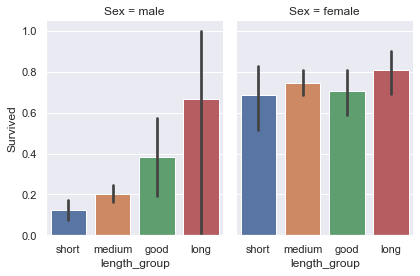

In [77]:
# Plot without Pclass
ax = sns.catplot(x='length_group',
                 y='Survived',
                 col='Sex',
                 data=combined,
                 order=['short', 'medium', 'good', 'long'],
                 kind='bar',
                 height=4,
                 aspect=0.75)

If you're a female then the chances of survival is the highest when you have a long name but they are all very close in terms of survival rate. Males are a whole new story. There is a big right skew. The longer the name the higher chance of survival.

### Create a new title feature

There are a few ways to get the title from the Name feature.

1. Split loop
    - combined['title'] = [i.split('.')[0] for i in combined.Name]
    - combined['title'] = [i.split(',')[1] for i in combined.title]
    - combined['title'] = combined.['title'].map(lambda x: x.strip())
2. Extraction
    - combined.Name.str.extract('([A-Za-z]+\\.)')
        - Groups multiple tokens together and creates a capture group for extracting a substring or using a backreference. 
        - Match any character in the set
            - **A-Z** range: matches a character in the range 'A' to 'Z' (case sensitive)
            - **a-z** range: matches a character in the range 'a' to 'z' (case sensitive)
            - **+**: match 1 or moree of the preceding token
            - **\\.** escaped character: matches a '.' character
    - So basically this looks for any letters before a period character  
3. Use regular expressions and create a function (Extraction)
    - import re
    - def extract_title(name):
    
            title_search = re.search('([A-Za-z]+)\.', name)

            if title_search:

                return title_search.group(1)

            return ""

            titles = combined['Name'].map(extract_title)

            combined['title'] = titles

In [78]:
# Extract title from Name
combined['title'] = combined.Name.str.extract('([A-Za-z]+)\.')

# Check
combined['title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: title, dtype: object

In [79]:
# Let's count the titles
pd.crosstab(combined.title, combined.Sex)

Sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


We could probably trim down these titles especially the ones less than 10 so they are grouped up so we can use the feature better. Let's create a list of ones that may not fit into the popular titles.

In [80]:
# Create a list
rare_title_list = ['Dona', 'Lady', 'Countess', 'Capt',
                   'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', "Jonkheer"]

female_list = ['Ms, Mlle']

In [81]:
combined[combined['title'].isin(rare_title_list)].title.value_counts()

Rev         8
Dr          8
Col         4
Major       2
Lady        1
Sir         1
Don         1
Capt        1
Countess    1
Dona        1
Jonkheer    1
Name: title, dtype: int64

Another way to replace values besides the logic in the cell below is to use replace method for each title.

1. [i.replace('Ms', 'Miss') for i in combined.title]
2. combined.title.replace(to_replace=['Dr', 'Rev', 'Col', 'Major', 'Capt'], value='Rare', inplace=True)


c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 51.,  21.,  22.,  40., 114., 160., 128., 122.,  97.,  64.,  51.,
         57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <a list of 20 Patch objects>)

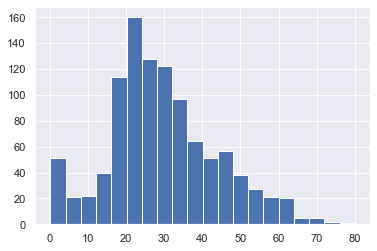

In [82]:
plt.hist(x=combined.Age,
         bins=20)


In [83]:
# Update titles
combined.loc[(combined.title.isin(rare_title_list)), 'title'] = 'Rare'

combined.loc[(combined.title.isin(['Ms', 'Mlle'])), 'title'] = 'Miss'

combined.loc[(combined.title=='Mme'), 'title'] = 'Mrs'

combined.loc[(combined.Age<11), 'title'] = 'Child_10'

# Check
combined.title.value_counts()

Mr          757
Miss        223
Mrs         198
Child_10     86
Rare         29
Master       16
Name: title, dtype: int64

Frequency of title :


,Count,Percentage
Mr,757,57.83
Miss,223,17.04
Mrs,198,15.13
Child_10,86,6.57
Rare,29,2.22
Master,16,1.22


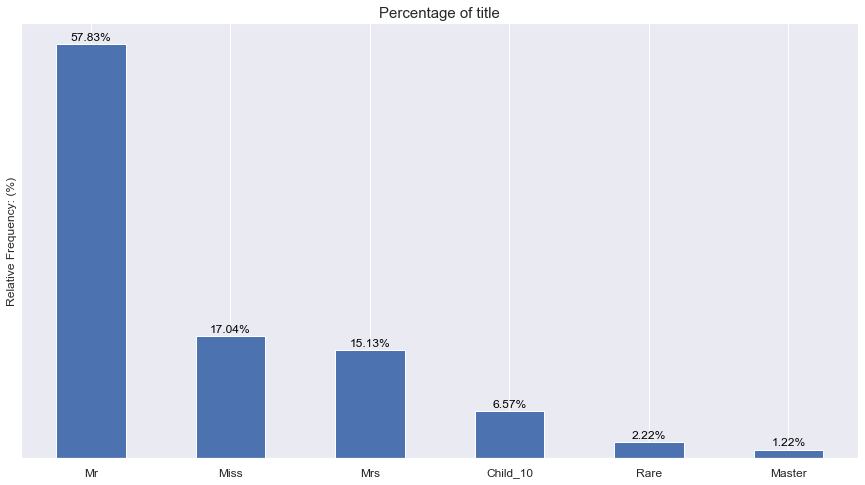

In [84]:
# Plot & table
freq_table(combined.title)

Text(8.96, 0.5, 'Survival Rate')

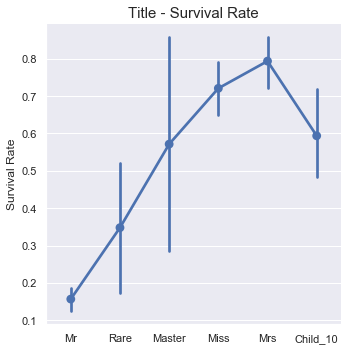

In [85]:
# Create a factor plot
sns.catplot(x='title',
            y='Survived',
            data=combined,
            kind='point',
            order=['Mr', 'Rare', 'Master', 'Miss', 'Mrs', 'Child_10'])

# Set plot features
plt.title('Title - Survival Rate', fontsize=15)
plt.xlabel('')
plt.ylabel('Survival Rate', fontsize=12)

In [86]:
# Let's look at Pclass and title together
pclass_title_survived = pd.crosstab(index=combined.Survived,
                                    columns=[combined.Pclass, combined.title],
                                    margins=True)

pclass_title_survived.index = ['Did not Survive', 'Survived', 'ColTotal']

round(pclass_title_survived/pclass_title_survived.loc['ColTotal']*100,1)

Pclass                 1                                           2         \
title           Child_10 Master   Miss     Mr    Mrs   Rare Child_10   Miss   
Did not Survive     33.3    0.0    2.1   65.4    2.3   46.7      0.0    7.4   
Survived            66.7  100.0   97.9   34.6   97.7   53.3    100.0   92.6   
ColTotal           100.0  100.0  100.0  100.0  100.0  100.0    100.0  100.0   

Pclass                                      3                              \
title               Mr    Mrs   Rare Child_10 Master   Miss     Mr    Mrs   
Did not Survive   91.2    9.8  100.0     56.8   50.0   50.0   88.7   50.0   
Survived           8.8   90.2    0.0     43.2   50.0   50.0   11.3   50.0   
ColTotal         100.0  100.0  100.0    100.0  100.0  100.0  100.0  100.0   

Pclass             All  
title                   
Did not Survive   61.6  
Survived          38.4  
ColTotal         100.0

I would have thought that people with Rare titles would have a higher survival rate just based on their original titles before the change. Breaking it down in the table helps as well so we can see where there is a high survival rate vs. low compared to looking at the aggregated view. Females are dominant as usual with the lowest survival % at 50 with a Pclass of 3.

### Create a new feature called family_size

I'm going to assume that the larger the family size the smaller the survival rate. To get the family size you need to add the Parch and SibSp features together + the individual (1).

In [87]:
combined['family_size'] = combined.Parch + combined.SibSp + 1

# Check
combined.family_size.head()

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64

In [88]:
# Check counts
fam_cnt = combined.family_size.value_counts()
fam_pct = round(combined.family_size.value_counts(normalize=True)*100,1)

# Create table
pd.concat([fam_cnt, fam_pct], axis=1, keys=['Total', 'Percent'])

,Total,Percent
1,790,60.4
2,235,18.0
3,159,12.1
4,43,3.3
6,25,1.9
5,22,1.7
7,16,1.2
11,11,0.8
8,8,0.6


### Create a new feature to group family

In [89]:
# Create a function to group family_size
def create_family_size_group(size):
    text=''
    if size<=1:
        text='single'
    elif size<=4:
        text='small'
    else:
        text='large'
    return text

# Create feature
combined['family_group'] = combined.family_size.map(create_family_size_group)

# Check
combined.family_group.head()

0     small
1     small
2    single
3     small
4    single
Name: family_group, dtype: object

Frequency of family_group :


,Count,Percentage
single,790,60.35
small,437,33.38
large,82,6.26


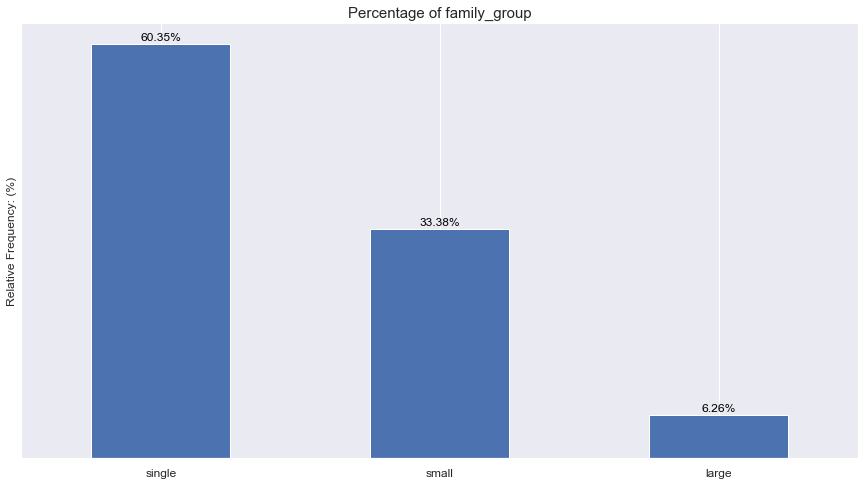

In [90]:
# Plot & table
freq_table(combined.family_group)

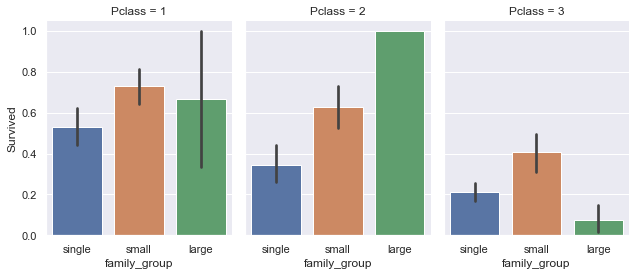

In [91]:
# Plot without Pclass
ax = sns.catplot(x='family_group',
                 y='Survived',
                 col='Pclass',
                 data=combined,
                 order=['single', 'small', 'large'],
                 kind='bar',
                 height=4,
                 aspect=0.75)

### Create a new feature called is_alone which is basically a flag indicating if the person came alone

In [92]:
combined['is_alone'] = [1 if i<2 else 0 for i in combined.family_size]

# Check
combined.is_alone.head()

0    0
1    0
2    1
3    0
4    1
Name: is_alone, dtype: int64

### Average fare

In [93]:
combined['fare_avg'] = combined.Fare/combined.family_size

# Check
combined.iloc[:,-3:].head()

,family_group,is_alone,fare_avg
0,small,0,3.62500
1,small,0,35.64165
2,single,1,7.92500
3,small,0,26.55000
4,single,1,8.05000


### Create a new feature called fare_group

In [94]:
def create_fare_group(fare):
    text=''
    if fare<4:
        text='very low'
    elif fare<=10:
        text='low'
    elif fare<=20:
        text='mid'
    elif fare<=45:
        text='high'
    else:
        text='rich'
    return text

# Call function on dataset
combined['fare_group'] = combined.Fare.map(create_fare_group)

# Check
combined.iloc[:,-3:].head()

,is_alone,fare_avg,fare_group
0,0,3.62500,low
1,0,35.64165,rich
2,1,7.92500,low
3,0,26.55000,rich
4,1,8.05000,low


In [95]:
combined.columns

Index(['Age', 'DataType', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'CabinValue', 'Gender',
       'name_length', 'length_group', 'title', 'family_size', 'family_group',
       'is_alone', 'fare_avg', 'fare_group'],
      dtype='object')

### Statistical analysis

In [96]:
combined.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Gender,name_length,family_size,is_alone,fare_avg
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.280089,0.385027,655.000000,2.294882,0.498854,0.383838,0.644003,27.130634,1.883881,0.603514,20.512586
std,14.413493,51.741875,0.865560,378.020061,0.837836,1.041658,0.486592,0.478997,9.506503,1.583639,0.489354,35.761239
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,7.452767
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,1.000000,25.000000,1.000000,1.000000,8.566667
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,30.000000,2.000000,1.000000,24.150000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000,82.000000,11.000000,1.000000,512.329200


In [97]:
### Describe only numerical columns

In [98]:
combined.describe(include=np.number)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Gender,name_length,family_size,is_alone,fare_avg
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.280089,0.385027,655.000000,2.294882,0.498854,0.383838,0.644003,27.130634,1.883881,0.603514,20.512586
std,14.413493,51.741875,0.865560,378.020061,0.837836,1.041658,0.486592,0.478997,9.506503,1.583639,0.489354,35.761239
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,7.452767
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,1.000000,25.000000,1.000000,1.000000,8.566667
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,30.000000,2.000000,1.000000,24.150000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000,82.000000,11.000000,1.000000,512.329200


### Use groupby to get survival rates

In [99]:
combined[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [100]:
combined[['family_group','Survived']].groupby('family_group').mean()

,Survived
family_group,
large,0.161290
single,0.303538
small,0.578767


### Survival across features

In [101]:
# Get overview by using all features
survived_summary = combined.groupby('Survived')
survived_summary.mean().reset_index()

,Survived,Age,Fare,Parch,PassengerId,Pclass,SibSp,Gender,name_length,family_size,is_alone,fare_avg
0,0.0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734,0.852459,24.531876,1.883424,0.681239,13.651162
1,1.0,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684,0.318713,30.871345,1.938596,0.476608,29.973691


### Correlations

In [102]:
pd.DataFrame(abs(combined.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Gender,0.543351
Pclass,0.338481
name_length,0.332350
Fare,0.257307
fare_avg,0.221600
is_alone,0.203367
Parch,0.081629
Age,0.077221
SibSp,0.035322


Gender has the highest correlation based off of the pearson's correlation which is the standard correlation coefficient. The second is Pclass, which makes sense where location and status can be a large factor.

- in statistics, the correlation coefficient r measures the strength and direction of a linear relationship. don't get this mixed upwith coefficient of determination which is the r^2 which shows percentage of variation in y which is explained by the x variables.
    - when Pearson's r is close to 1 that means there is a strong relationship between the two variables
    - when Pearson's r is close to 0 that means there is a weak relationship between the two variables


# Let's get R-squared (Coefficient of Determination)

In [103]:
# Top features
corr = combined.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Gender         0.295231
Pclass         0.114569
name_length    0.110456
Fare           0.066207
fare_avg       0.049107
is_alone       0.041358
Parch          0.006663
Age            0.005963
SibSp          0.001248
family_size    0.000277
PassengerId    0.000025
Name: Survived, dtype: float64

The coefficient of determination provides a 'goodness of fit' measure for the predictions to the observations. This is a value between 0 and 1. Basically it's the proportion of the variance in the dependent variable (y) that is predictable from the independent variable (x).

### Create a heatmap

Text(0.5, 1.05, 'Feature Correlations')

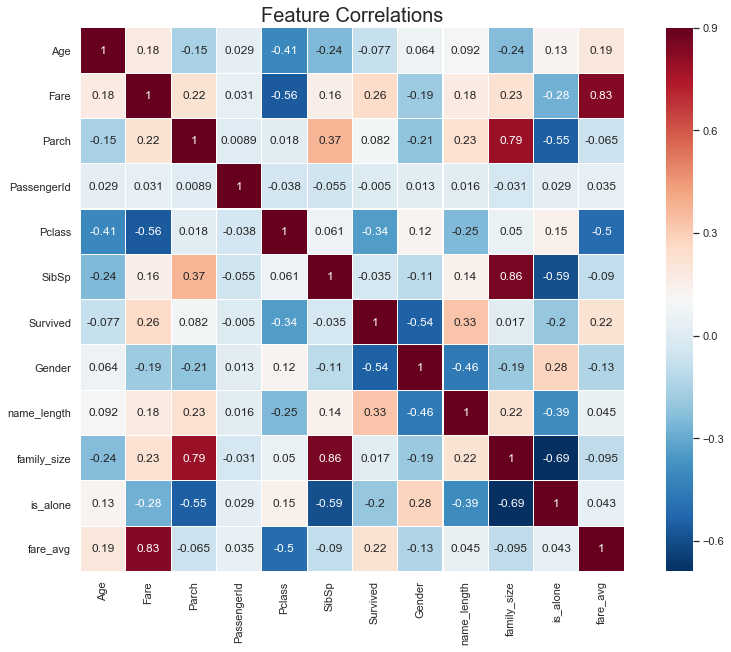

In [104]:
# Create figure space
plt.subplots(figsize=(15,10))

# Create matrix
sns.heatmap(combined.corr(),
            annot=True,
            cmap='RdBu_r',
            linewidths=0.10,
            linecolor='white',
            vmax=0.90,
            square=True)

# Set plot features
plt.title('Feature Correlations', y=1.05, fontsize=20)

### Statistical Test for Correlation

#### Hypothesis Testing

A statistical test which compares the mean of two groups and tries to find out whether the two sample means are different form each other and if they are different, how significantly that difference is. 

In other words, all hypothesis testing is asking is: does our evidence make the null hypothesis (what the world may look like) look ridiculous. If so, we choose the alternative hypothesis (all other situations). 

Rejecting the null hypothesis means that we learned something and we should change our minds. Not rejecting the null means that we learned nothing intersting that may change our minds which is determined by the p-value (probability of getting at least something as bad as the world we are trying to prove (alternative)). 

#### Steps to take in a hypothesis test:
1. Formulate a well-developed research problem or question (like any other problems we attempt to answer)
2. What is the null hypothesis and what is the alternative hypothesis? What's our sample size? What is a big enough sample size needed to make sure the test we are performing will be significant? This could be determined by power, which asks us did we do our homework (Cassie K.)? Power analysis is a way to check how much power you need.
3. Determine the test statistic. Usually this is determined by the type of test we are performing and if it's one-tailed or two-tailed.
4. Specify the significance level (risk tolerated). Alpha is the probability of rejecting the null when it is true, in other words, we are confidence with rejecting the null at this level. 
5. Compute test statistic.
6. Compute the p-value. The smaller the value, the stronger the evidence that there is something interesting going on and we should take a look.
7. Communicate the result. Are we rejecting the null or failing to accept the null? Is there going to be a change?

#### Titanic: Hypothesis Test

1. Is there a significant difference in the mean sex between passengers who survived and who didn't survive?
2. Hypothesis
    - Ho = No difference in the survival rate between the male and female passengers
    - Ha = There is a difference in the survival rate between the male and female passengers
3. Two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 4. Since we do not know the standard deviation and n is small, we will use the t-distribution.
5. Compute statistic
6. Compute p-value
7. Result

### Random sampling between Gender

Take 50 random samples of males and females

In [105]:
# Split the genders into two populations
males = combined[(combined.Gender==1) & combined.Survived.notnull()]
females = combined[(combined.Gender==0) & combined.Survived.notnull()]

# Get 50 random samples using the random module
import random
male_sample = random.sample(list(males.Survived), 50)
female_sample = random.sample(list(females.Survived), 50)

# Get sample means
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)

# Print results
print ("Male sample mean: " + str(male_sample_mean))
print ("Female sample mean: " + str(female_sample_mean))
print ("Difference between male and female sample mean: " + str(female_sample_mean - male_sample_mean))

Male sample mean: 0.16
Female sample mean: 0.66
Difference between male and female sample mean: 0.5


### Perform an indepdendent t-test

In [106]:
import scipy.stats as stats
ttest_result = stats.ttest_ind(male_sample, female_sample)

# Get p-value
print('This is the p-value when we use the standard form: ' + format(ttest_result.pvalue, '.32f'))

This is the p-value when we use the standard form: 0.00000006707282548209147035243421


### Result

The p-value is so low, which indicates a large significance in the genders. The observation is therefore significant and we reject the null hypothesis. There is a significant differnces between males and females in survival rates.

### More  Feature Engineering

Feature engineering can make or break your model sometimes. With poor features as inputs, your model will not be good. This particular section can also bring out the more creative side in creating extra features that may be helpful. We could combine certain features together, grouped features, etc. 

But be careful of multicollinearity as we don't want that. Multicollinearity is when there is a strong relationship among independent variables. This could be bad for your model as it will bring it more bias if two variables are similar, we would only want to use the best one.

### Create a new feature called name_length

Create a new feature name_length that will count the letters of each name. This is a new one. I've never tried this one before when I was working on this in R.

In [107]:
# Loop through name
combined['name_length'] = [len(i) for i in combined.Name]

# Define a new function to group name lengths
def create_name_length_group(length):
    grp_name=''
    if length<=20:
        grp_name='short'
    elif length<=35:
        grp_name='medium'
    elif length<=45:
        grp_name='good'
    else:
        grp_name='long'
    return grp_name

# Use map(func, iter) on the data
combined['name_length_group'] = combined.name_length.map(create_name_length_group)

# Check
combined.iloc[:,-3:].head()

,fare_avg,fare_group,name_length_group
0,3.62500,low,medium
1,35.64165,rich,long
2,7.92500,low,medium
3,26.55000,rich,good
4,8.05000,low,medium


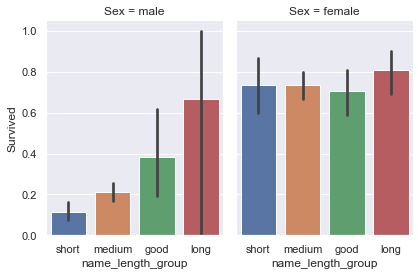

In [108]:
# Plot
ax = sns.catplot(x='name_length_group',
                 y='Survived',
                 col='Sex',
                 data=combined,
                 order=['short', 'medium', 'good', 'long'],
                 kind='bar',
                 height=4,
                 aspect=0.75)

In [109]:
# Already made the feature
combined.drop(['name_length_group'], axis=1, inplace=True)

### Drop any features before we create dummy variables

Drop any columns we are not inputting into the model including the numerical ones if we are using grouped features.

In [110]:
combined.columns

Index(['Age', 'DataType', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'CabinValue', 'Gender',
       'name_length', 'length_group', 'title', 'family_size', 'family_group',
       'is_alone', 'fare_avg', 'fare_group'],
      dtype='object')

In [111]:
# Create a copy just in case we want to revert
combined_copy = combined.copy()

# Drop features
combined.drop(['Name', 'Parch', 'PassengerId', 'SibSp', 'Sex', 'Ticket', 'family_size', 'name_length'], axis=1, inplace=True)

In [112]:
combined.columns

Index(['Age', 'DataType', 'Embarked', 'Fare', 'Pclass', 'Survived',
       'CabinValue', 'Gender', 'length_group', 'title', 'family_group',
       'is_alone', 'fare_avg', 'fare_group'],
      dtype='object')

### Dummy Variables

Dummy variables is an important pre-processing step. It's usually used when important features are not numerical so we have to transform them into binary values 0 or 1. Many models would prefer or need numerical features to be used in order for it to work properly. While working with a dataset, we want to make sure the computer is able to understand the differences. Computer processing power is also a lot better with straight numbers, vectors, or anything numer related vs strings/text/categorical.

To transform variables in Python, we must use pandas.get_dummies() function. In R, it's similar to model_matrix(~y). This will produce sparse columns which will grow horizontally and can get exponentially more difficult as we have to search through more dimensions.

In [113]:
# Create a list of features for dummy
dummy_list = ['Embarked', 'CabinValue', 'length_group', 'title', 'family_group', 'fare_group']

model_data = pd.get_dummies(combined,
                            columns=dummy_list,
                            drop_first=False)

In [114]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function that takes a dataframe with missing values and outputs it with filled values
def complete_age(df):
    # Get features except Survived since Age is to the right of Survived
    feature_list = ['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'name_length', 'title', 'family_size', 'is_alone', 'fare_avg']
    age_df = df.loc[:, 'Age':]

    # Get Age nulls and non-nuls
    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()]
    
    # Set target variable: age
    y = temp_train.Age.values
    x = temp_train.loc[:, 'Gender':].values
    
    # Use RandomForestRegressor(n_estimators, n_jobs)
    rf = RandomForestRegressor(n_estimators=1500, n_jobs=1)
    rf.fit(x, y)
    
    # Predict
    predicted_age = rf.predict(temp_test.loc[:, 'Gender':])
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df

In [115]:
# Use the new functions on the dataset
complete_age(model_data)

,Age,DataType,Fare,Pclass,Survived,Gender,is_alone,fare_avg,Embarked_C,Embarked_Q,...,title_Mrs,title_Rare,family_group_large,family_group_single,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_rich,fare_group_very low
0,22.000000,Train,7.2500,3,0.0,1,0,3.625000,0,0,...,0,0,0,0,1,0,1,0,0,0
1,38.000000,Train,71.2833,1,1.0,0,0,35.641650,1,0,...,1,0,0,0,1,0,0,0,1,0
2,26.000000,Train,7.9250,3,1.0,0,1,7.925000,0,0,...,0,0,0,1,0,0,1,0,0,0
3,35.000000,Train,53.1000,1,1.0,0,0,26.550000,0,0,...,1,0,0,0,1,0,0,0,1,0
4,35.000000,Train,8.0500,3,0.0,1,1,8.050000,0,0,...,0,0,0,1,0,0,1,0,0,0
5,29.873721,Train,8.4583,3,0.0,1,1,8.458300,0,1,...,0,0,0,1,0,0,1,0,0,0
6,54.000000,Train,51.8625,1,0.0,1,1,51.862500,0,0,...,0,0,0,1,0,0,0,0,1,0
7,2.000000,Train,21.0750,3,0.0,1,0,4.215000,0,0,...,0,0,1,0,0,1,0,0,0,0
8,27.000000,Train,11.1333,3,1.0,0,0,3.711100,0,0,...,1,0,0,0,1,0,0,1,0,0
9,14.000000,Train,30.0708,2,1.0,0,0,15.035400,1,0,...,1,0,0,0,1,1,0,0,0,0


In [116]:
model_data.isnull().sum()

Age                      0
DataType                 0
Fare                     0
Pclass                   0
Survived               418
Gender                   0
is_alone                 0
fare_avg                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
CabinValue_A             0
CabinValue_B             0
CabinValue_C             0
CabinValue_D             0
CabinValue_E             0
CabinValue_F             0
CabinValue_G             0
CabinValue_T             0
length_group_good        0
length_group_long        0
length_group_medium      0
length_group_short       0
title_Child_10           0
title_Master             0
title_Miss               0
title_Mr                 0
title_Mrs                0
title_Rare               0
family_group_large       0
family_group_single      0
family_group_small       0
fare_group_high          0
fare_group_low           0
fare_group_mid           0
fare_group_rich          0
fare_group_very low      0
d

### Plot Age distribution

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Pre-Model Age Distribution')

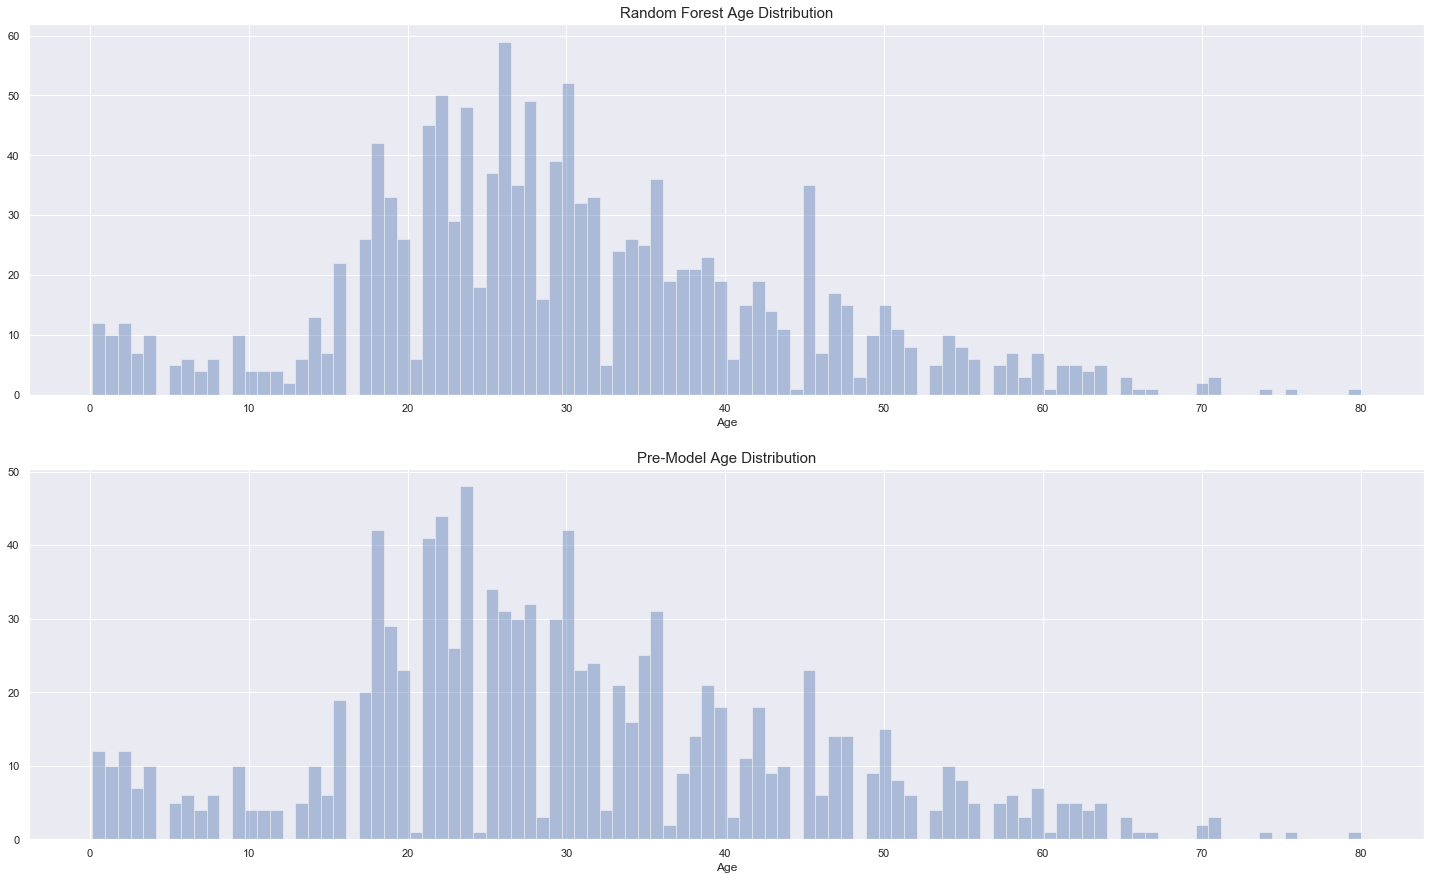

In [117]:
# Create figure space
fig, ax = plt.subplots(figsize=(25,15), ncols=1, nrows=2)

# Create distribution plot with sns.distplot()
ax1 = sns.distplot(model_data.Age, bins=100, kde=False, rug=False, norm_hist=False, ax=ax[0])
ax2 = sns.distplot(combined.Age, bins=100, kde=False, rug=False, norm_hist=False, ax=ax[1])

# Set titles
ax1.set_title('Random Forest Age Distribution', fontsize=15)
ax2.set_title('Pre-Model Age Distribution', fontsize=15)

### Create an Age group bin feature
Follow all the steps above and write them altogether
1. define the function
2. apply the function to the datasets
3. create dummy variables
4. drop the un-needed features (age)

In [118]:
# Create a function to group ages
def create_age_group(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

# Apply using the map function
model_data['age_group'] = model_data['Age'].map(create_age_group)

# Create dummies
model_data = pd.get_dummies(model_data, columns=['age_group'], drop_first=True)

# Drop columns
model_data.drop('Age', axis=1, inplace=True)

# Check 
model_data.head()

,DataType,Fare,Pclass,Survived,Gender,is_alone,fare_avg,Embarked_C,Embarked_Q,Embarked_S,...,fare_group_rich,fare_group_very low,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,Train,7.2500,3,0.0,1,0,3.62500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Train,71.2833,1,1.0,0,0,35.64165,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,Train,7.9250,3,1.0,0,1,7.92500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Train,53.1000,1,1.0,0,0,26.55000,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,Train,8.0500,3,0.0,1,1,8.05000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Pre-Modeling Tasks
________________________________________________________________________________________

1. Separate dependent and independent variables
2. Split the training data
3. Feature scaling
4. Modeling the data

In [119]:
# Drop DataType
model_data.drop('DataType', axis=1, inplace=True)

# Split model_data
train = model_data[1:891]
test = model_data[892:model_data.shape[0]]

print('Train data shape: ' + str(train.shape))
print('Test data shape: ' + str(test.shape))

Train data shape: (890, 43)
Test data shape: (417, 43)


In [120]:
# Split the variables
y = train['Survived']
X = train.drop(['Survived'], axis=1)

Split the training data for cross-validation

Split the train data into 4 parts, train_x, test_x, train_y, test_y

    train_x and train_y first used to train the algorithm.
    then, test_x is used in that trained algorithms to predict outcomes.
    Once we get the outcomes, we compare it with test_x


In [121]:
# Import split module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Check
X_train.head(3)

,Fare,Pclass,Gender,is_alone,fare_avg,Embarked_C,Embarked_Q,Embarked_S,CabinValue_A,CabinValue_B,...,fare_group_rich,fare_group_very low,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
346,13.000,2,0,1,13.000,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
243,7.125,3,1,1,7.125,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
345,13.000,2,0,1,13.000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature scaling

This is an important concept and it has several methods to achieve this. Since numbers are not in the same scale and can have large effects where the model will read a higher number as better when it is actually not... and more issues. So we need to do feature scaling to get a better result.

**Types of Scalers**
- **MinMaxScaler** - Scales the data using the max and min values so that it fits between 0 and 1.
- **StandardScaler** - Scales the data so that it has mean 0 and variance of 1.
- **RobustScaler** - Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.

Call the StandardScaler() function
1. Use fit_transform() to scale the data
2. Use transform() on all other datasets that will be used


### Reshaping

In [122]:
# Get train headers
headers = X_train.columns

### Scale the data

In [123]:
# Import StandardScaler() from the preprocessing module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transform the variables to be on the same scale
X_train = scaler.fit_transform(X_train) # 1. fit_transform(training data)
X_test = scaler.transform(X_test)       # 2. transform(testing data)

# Transform the test(data) as well
ytest = test['Survived']
Xtest = test.drop(['Survived'], axis=1)
Xtest = scaler.transform(Xtest)

### Modeling the data

#### List of some classification models:
    
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Bagging on Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

### Creating functions for the modeling process

Will go over some of the model after step by step. But the following steps taken below are:

1. Import all of the models and call each of the algorithms
2. Create a new train_accuracy() function that will:
    - Fit the training data   # model.fit(X_train, y_train)
    - Score the training data # model.score(X_train, y_train) - Note: Could use (X_test, y_test) 
    - Round the score
    - Return accuracy score
3. Create a new dataframe and store all of the accuracy values from the model
4. Sort by best accuracy

In [124]:
# Set seed
seed = 150

# 1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

# 2.Support Vector Machines
from sklearn.svm import SVC
svc = SVC(gamma='auto')

# 3.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=seed, n_estimators=500)

# 4.KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 5.Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# 6.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=seed)

# 7.Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=seed)

# 8.Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=seed)

# 9.ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=seed)

# 10.Extreme Gradient Boosting
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=seed)

**Training Accuracy of the Classifiers:**


,Train_accuracy (%)
RF,96.14
DT,96.14
ETC,96.14
GBC,92.11
XGBC,89.77
SVC,87.92
KNN,87.08
ABC,86.24
LR,84.90
GNB,70.47


In [ ]:
# Create a function that returns train accuracy of different models.
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

# run block of code and catch warnings
import warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    # execute code that will generate warnings
    
    # Models with best training accuracy:
    train_accuracy = pd.DataFrame({'Train_accuracy (%)': [train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), 
                                                          train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), 
                                                          train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), 
                                                          train_accuracy(xgbc)]})
    train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
    sorted_train_accuracy = train_accuracy.sort_values(by='Train_accuracy (%)', ascending=False)

print('**Training Accuracy of the Classifiers:**')
display(sorted_train_accuracy)

Training data should be as higher as possible since the model is technically fitted onto that same dataset. Naive bayes is not looking good and tree algorithms are pretty good for now. Let's cross-validate.
### Validation
Is the model any good? Usually, it helps to verify that the effectiveness of the algorithm is consistent and we can do that by cross-validating. There are different types of cv methods, but we will be using a K-Fold cross-validation. A little more on what this method is will be shown later.
- First we want to automate it so we create a function to return the mean cross-validation score
- Following similar steps above, we would want to create a dataframe to store the mean scores and sort it

In [125]:
# Import cross_val_score() function
from sklearn.model_selection import cross_val_score

# Create a function that returns mean cv score for the models
def cv_score(model):
    '''
    
    If two parameters then:
    cv_score(model, scoring_method)
    
    Pass the two arguments into the cv_score() function, for example:
    cv_score(rf, 'accuracy')
    
    This will return the mean cross-validation score using the scoring method in the 2nd argument
    
    Update 2019-06-14: Changed to 1 argument and use 'scoring_method' parameter another time.
    
    Pass just one argument:
    cv_score(rf)
    
    '''
    x_val_score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    x_val_score = np.round(x_val_score*100,2)
    return x_val_score

# Call the cv_score() function and store the best cv accuracy into a new dataframe
x_val_score_df = pd.DataFrame({'CV_Score (%)': [cv_score(lr), cv_score(svc), cv_score(rf),
                                                cv_score(knn), cv_score(gnb), cv_score(dt),
                                                cv_score(gbc), cv_score(abc), cv_score(etc),
                                                cv_score(xgbc)]})

# Create index names
x_val_score_df.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']

# Sort the dataframe
sorted_x_val_score_df = x_val_score_df.sort_values(by='CV_Score (%)', ascending=False)

# Return dataframe
print('**Models 10-fold Cross-Validation Scores:**')
display(sorted_x_val_score_df)

**Models 10-fold Cross-Validation Scores:**


,CV_Score (%)
GBC,84.10
XGBC,83.25
SVC,82.93
LR,82.59
RF,82.56
ABC,82.41
ETC,81.55
DT,81.21
KNN,80.39
GNB,64.68


Logistic regression moved up from 2nd to last to 4th in cross-validation scoring and random forest dropped. Interesting how random forest would drop so much as an ensemble type of algorithm. Looking at this before tuning, the dataset prefers sequential types of trees )gb) vs parallel ensembles (rf).

### Joining the two scoring dataframes

3 ways to do a join:
1. Concat
    - pd.concat([sorted_x_val_score_df, sorted_train_accuracy], axis=1, sort=True)
2. Join
    - sorted_x_val_score_df.join(sorted_train_accuracy)
3. Merge
    - pd.merge(sorted_x_val_score_df, sorted_train_accuracy, left_index=True, right_index=True)

In [126]:
# Using concat() to join then .sort_values(by, ascending)
pd.concat([sorted_x_val_score_df, sorted_train_accuracy], axis=1, sort=False).sort_values(by='CV_Score (%)',ascending=False)

,CV_Score (%),Train_accuracy (%)
GBC,84.10,92.11
XGBC,83.25,89.77
SVC,82.93,87.92
LR,82.59,84.90
RF,82.56,96.14
ABC,82.41,86.24
ETC,81.55,96.14
DT,81.21,96.14
KNN,80.39,87.08
GNB,64.68,70.47


### Hyperparameter Tuning

Define the hyperparameters for each model by creating a dictionary to store each value.

Tuning is taking awhile so I reduced the number of values to tune, just to get an idea.

In [136]:
# 1.Logistic Regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
lr_params = {'penalty': ['l1', 'l2'],
             'solver': ['liblinear'],
             'C': np.logspace(0, 4, 10)} # Return numbers spaced evenly on a log scale (start, stop, num)

# 2.Support Vector Machines (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
svc_params = {'C': [5, 12],                              # cost (penalty)
              'kernel': ['linear','rbf'],                # type of kernel
              'gamma': [0.1, 0.001]}                     # gamma (kernel coefficient)

# 3.Random Forest Classifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
rf_params = {'criterion':['gini','entropy'],              # function to measure the quality of a split
             'n_estimators':[10, 30],                     # number of trees in the forest
             'min_samples_leaf':[1, 3],                   # min number of samples required to be at a leaf node
             'min_samples_split':[3, 4],                  # min number of samples required to split an internal node
             'max_features':['sqrt', 'auto'],             # number of features to consider when looking for the best split
             'random_state':[seed]}

# 4.KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
knn_params = {'n_neighbors':[3, 4],                                # number of neighbors to use
#               'leaf_size':[1, 2],                                  # leaf size passed to BallTree or KDTree
#               'weights':['uniform', 'distance'],                   # weight function used in prediction (equal, distance)
              'algorithm':['auto']}                                # algorithm used to compute the nearest neighbors

# 5.Gaussian Naive Bayes

# 6.Decision Tree Classifier (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
dt_params = {'max_features': ['auto', 'sqrt'],         # num of features to consider when looking for the best split
#              'min_samples_split': [2, 4],              # min number of samples required to split an internal node
#              'min_samples_leaf':[2, 4],                # min number of samples required to be at a leaf node
             'random_state':[seed]}

# 7.Gradient Boosting Classifier
gbc_params = {'learning_rate': [0.01, 0.05],     # shrinkage
              'max_depth': [2, 4, 6],            # depth of nodes in a tree
              'min_samples_split': [2, 3],       # min number of samples required to split an internal node
              'random_state':[seed]}             # random number generator

# 8.Adaboost Classifier
abc_params = {'n_estimators':[100, 300],         # max num of estimators at which boosting is terminated
              'learning_rate':[0.001, 0.1],      # shrinks the contribution of each classifier
              'random_state':[seed]}

# 9.ExtraTrees Classifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
etc_params = {'max_depth':[None],               # max depth of the tree
              'max_features':[1, 3, 5],         # num of features to consider when looking for the best split
#               'min_samples_split':[2, 3],       # min number of samples required to split an internal node
#               'min_samples_leaf':[2, 3],        # min number of samples required to be at a leaf node
#               'bootstrap':[False],              # bootstrap samples are used when building trees
#               'n_estimators':[100],             # number of trees in the forest
#               'criterion':["gini"],             # function to measure the quality of a split (or entropy)
              'random_state':[seed]}

# 10.Extreme Gradient Boosting
xgbc_params = {'n_estimators': (100, 1000),     # trees
#               'learning_rate': (0.01, 0.6),     # shrinkage of weights
#               'subsample': (0.3, 0.9),          # random sample for each tree
#               'max_depth': [3, 4],              # max tree depth
#               'colsample_bytree': (0.5, 0.9),   # fraction of columns to be randomly samples for each tree
#               'min_child_weight': [1, 2],       # minimum sum of weights of all observations required
              'random_state':[seed]}

### Define hyperparameter function

In [137]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV # RandomSearchCV()

def tune_hyperparameters(model, params):
    global best_params, best_score
    '''
    
    1. Create a grid search on all of the hyperparameters and score them
    2. After creating the grid with the hyperparameters, we need to fit the model with training data
    3. After fitting, get the best parameters and score
    
    '''
    # Grid search 10-fold cross-validation through hyperparameters
    grid = GridSearchCV(model, params, verbose=0, cv=10, scoring='accuracy', n_jobs=-1) # optional n_jobs=-1 to use all cores
    
    # Fit the model using the grid
    grid.fit(X_train, y_train)
    
    # Get best parameters and scores
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)

### Tune each model using the tune_hyperparameters(model, parameters) function

In [138]:
# 1.Logistic Regression
tune_hyperparameters(lr, lr_params)
lr_best_params, lr_best_score = best_params, best_score

# # 2.Support Vector Machines
# tune_hyperparameters(svc, svc_params)
# svc_best_params, svc_best_score = best_params, best_score

# 3.Random Forest Classifier
tune_hyperparameters(rf, rf_params)
rf_best_params, rf_best_score = best_params, best_score

# # 4.KNN
# tune_hyperparameters(knn, knn_params)
# knn_best_params, knn_best_score = best_params, best_score

# # 6.Decision Tree Classifier
# tune_hyperparameters(dt, dt_params)
# dt_best_params, dt_best_score = best_params, best_score

# 7.Gradient Boosting Classifier
tune_hyperparameters(gbc, gbc_params)
gbc_best_params, gbc_best_score = best_params, best_score

# # 8.Adaboost Classifier
# tune_hyperparameters(abc, abc_params)
# abc_best_params, abc_best_score = best_params, best_score

# # 9.ExtraTrees Classifier
# tune_hyperparameters(etc, etc_params)
# etc_best_params, etc_best_score = best_params, best_score

# # 10.Extreme Gradient Boosting
# tune_hyperparameters(xgbc, xgbc_params)
# xgbc_best_params, xgbc_best_score = best_params, best_score

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning

### Store tuned scores

In [139]:
# Store the best_score_ values into a new dataframe
tuned_score_df = pd.DataFrame({'Tuned_Score (%)': [lr_best_score, rf_best_score, gbc_best_score]})
# Create index names
tuned_score_df.index = ['LR', 'RF', 'GBC']

# Sort the dataframe
sorted_tuned_score_df = tuned_score_df.sort_values(by='Tuned_Score (%)', ascending=False)

# Return dataframe
print('**Tuned Scores for Models:**')
display(sorted_tuned_score_df)

**Tuned Scores for Models:**


,Tuned_Score (%)
GBC,84.73
RF,84.56
LR,82.72


### Create a function to compare cv scores with tuned scores

In [140]:
# Create the function to will take in the sorted dataframe
def compare_scores(acc):
    global ax1
    '''
    
    Steps are similar to how we plotted the features before modeling.
    1. Define any arguments for the plots
    2. Create the plot type
    3. Set plot features
    
    '''
    
    font_size=12
    title_size=15
    
    # Create plot
    ax1 = acc.plot.bar(legend=False, title='Models %s.' % ''.join(list(acc.columns)),
                       figsize=(18,6), color='seagreen')
    
    # Set plot features
    ax1.title.set_size(fontsize=title_size)
    pct_bar_labels()
    plt.ylabel('Accuracy %', fontsize=font_size)
    plt.show()

### Compare cv scores with tuned scores to find best model

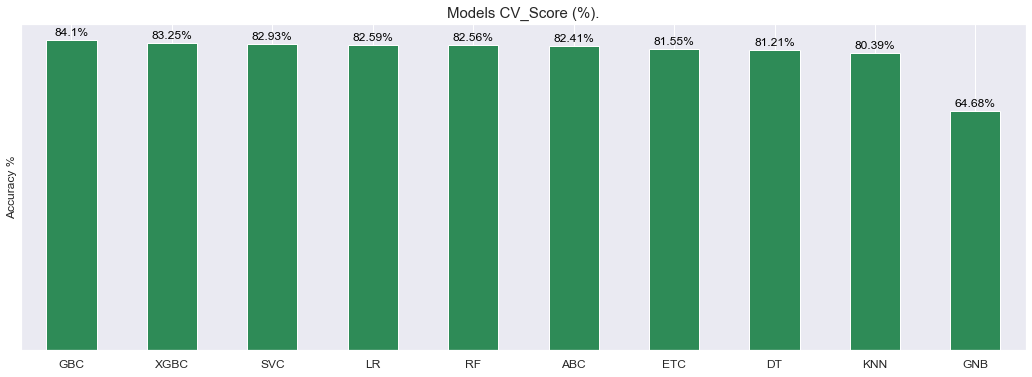

In [141]:
# CV Scores
compare_scores(sorted_x_val_score_df)

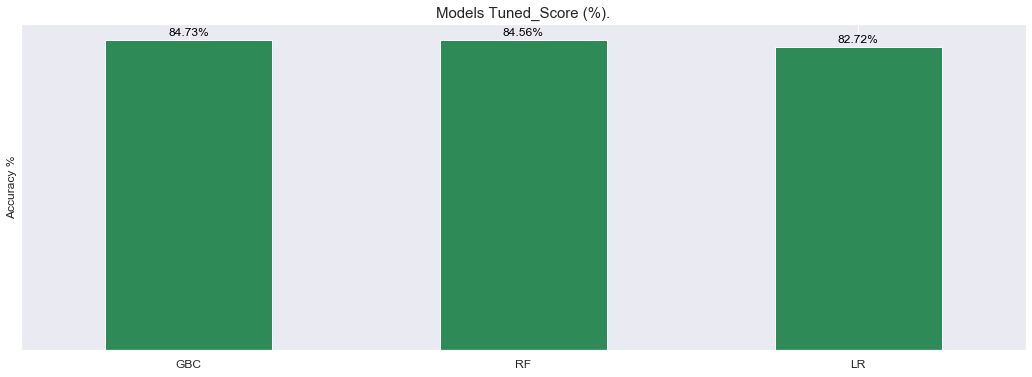

In [142]:
# Tuned Scores
compare_scores(sorted_tuned_score_df)

Running only 3 of the models, there is only a small increase in mean training accuracy. **Would need to do more feature engineering to get better scores.**

### Models with Optimized Hyperparameters

In [143]:
rf  = RandomForestClassifier(**rf_best_params)
gbc = GradientBoostingClassifier(**gbc_best_params)
lr  = LogisticRegression(**lr_best_params)

In [146]:
# Train all of the models with the new hyperparameters
model_list = {'RF':rf, 'GBC':gbc, 'LR':lr}

# Score all of the models
score_list = []

# Loop through the model list
for x, (keys, items) in enumerate(model_list.items()):
    
    # Fit the model using training data
    items.fit(X_train, y_train)
    
    # 10-fold Cross-validation
    scores = cross_val_score(items, X_train, y_train, cv=10, scoring='accuracy')*100
    
    # Add mean score of model to the score list
    score_list.append(scores.mean())
    
    # Print model accuracies with standard deviation of scores
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

Mean Accuracy: 84.6207 (+/- 5.1882) [RF]
Mean Accuracy: 84.7471 (+/- 2.7723) [GBC]
Mean Accuracy: 82.7586 (+/- 4.8617) [LR]


c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\david ly\appdata\local\programs\python\

### Predict
So far we have:
1. Created baseline models without any hyperparameter tuning.
2. Cross-validated each model to get mean scores
3. Hyperparameter tuned each model
4. Cross-validated each tuned model to get mean scores

The next step would be to predict the survival rate in the test set using the trained models.

In [147]:
# Create a dataframe to store predicted values
predictions = pd.DataFrame({'rf':rf.predict(X_test), 'gbc':gbc.predict(X_test), 'lr':lr.predict(X_test)})

print('Model Predictions:')
display(predictions.head())

Model Predictions:


,rf,gbc,lr
0,1.0,1.0,1.0
1,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


### Feature Importance

Probably one of the more important areas besides feature engineering. You get to see what the models believe will help the model predict the best. In a way it's applied machine learning as we engineer and figure out the best ones to use.

In [163]:
# Create a new function to capture feature importance for free models (RF, GB, XGB)
def feature_importance(model):
    
    importance = pd.DataFrame({'Feature': headers,
                               'Importance': np.round(model.feature_importances_,3)})
    
    importance = importance.sort_values(by = 'Importance', ascending = False).set_index('Feature')
    
    return importance

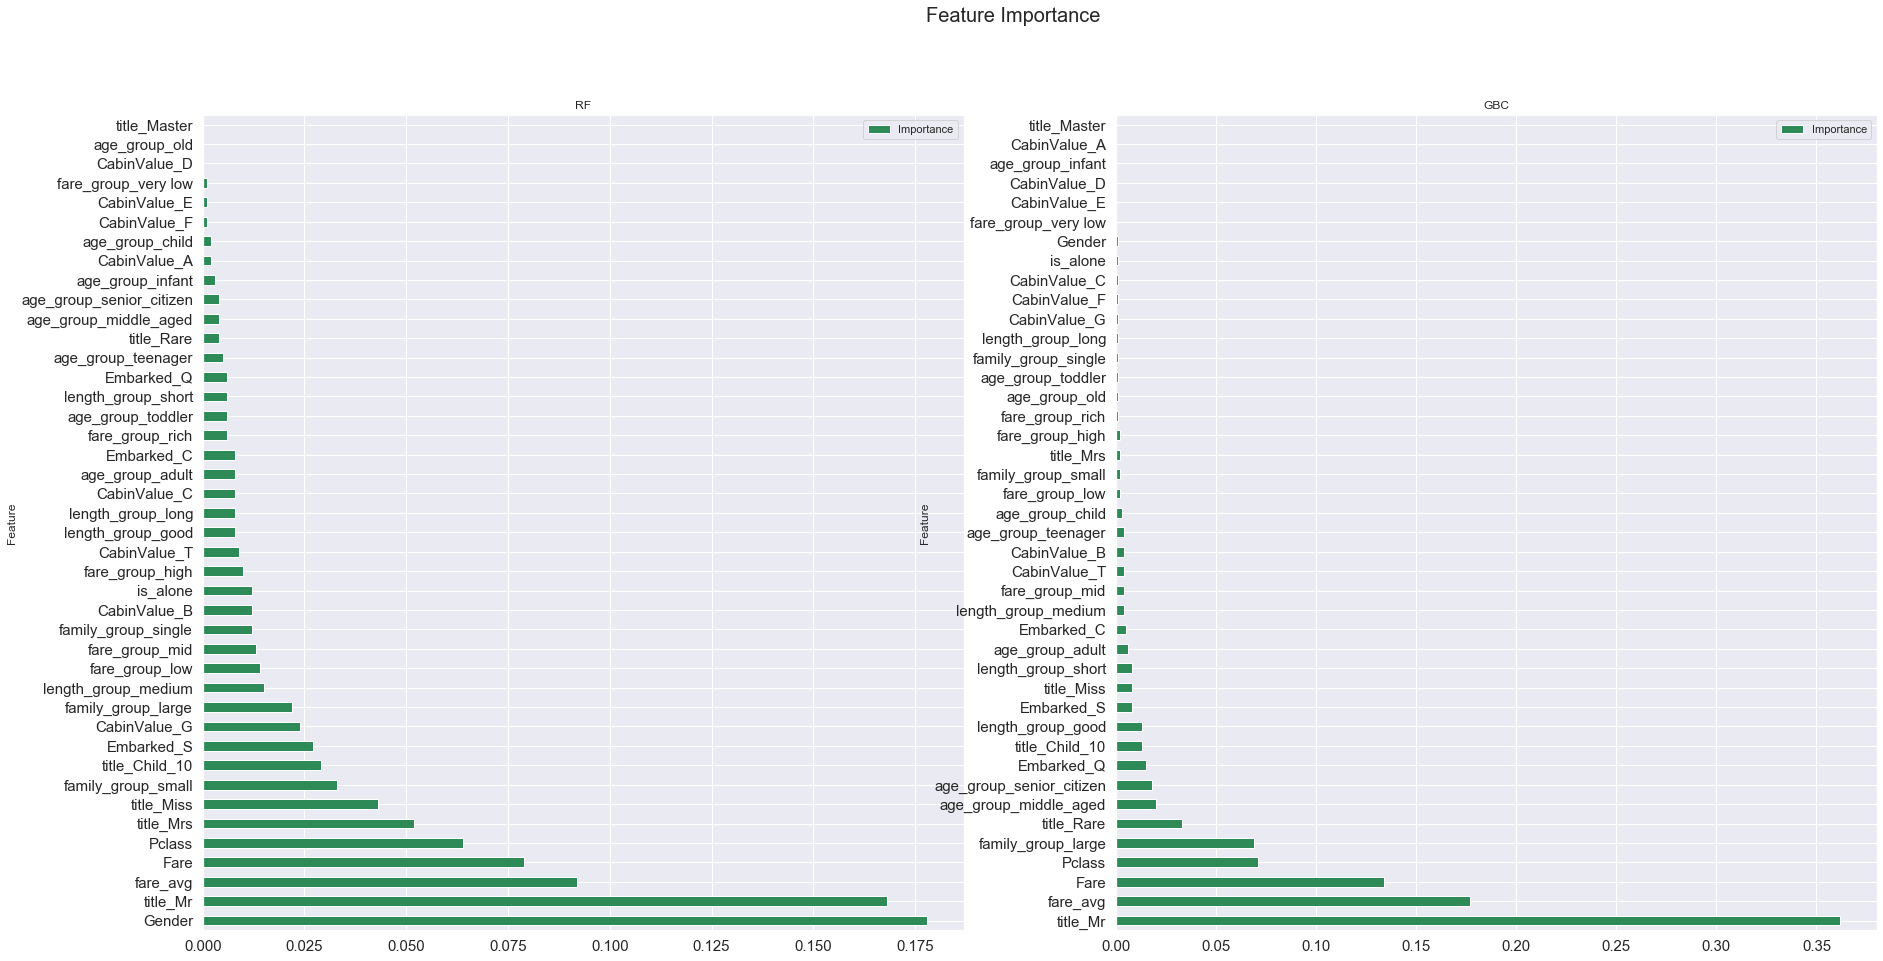

In [170]:
# Create plots for view feature importance graphically
fig, axes = plt.subplots(figsize=(30,15), ncols=2, nrows=1)
fig.suptitle('Feature Importance', fontsize=20)

models_used = [rf, gbc]
model_names = ['RF', 'GBC']

# https://www.geeksforgeeks.org/zip-in-python/
for ax, model, name in zip(axes.flatten(), models_used, model_names):
    feature_importance(model).plot.barh(ax=ax, title=name, fontsize=15, color='seagreen')

### Plotting learning curve

In [198]:
# Import learning_curve() function
from sklearn.model_selection import learning_curve

# Define function
def plot_learning_curve(model):
    
    # Create a feature matrix and target vector
    X, y = X_train, y_train
    
    # Create cross-validation training and test scores
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10,
                                                            scoring='accuracy', n_jobs=-1, 
                                                            train_sizes=np.linspace(0.01, 1.0, 15),
                                                            random_state=seed)
        
    # Create mean and standard deviation of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create mean and standard deviation of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean,'o-', color='red',  label='Training Score')
    plt.plot(train_sizes, test_mean,'o-', color='green', label='Cross-Validation Score')
    
    # Create plot
    font_size = 15
    plt.xlabel('Training Set Size', fontsize=font_size)
    plt.ylabel('Accuracy Score', fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(loc='best')
    plt.grid()

Text(0.5, 0.98, 'Learning Curves of Optimized Models')

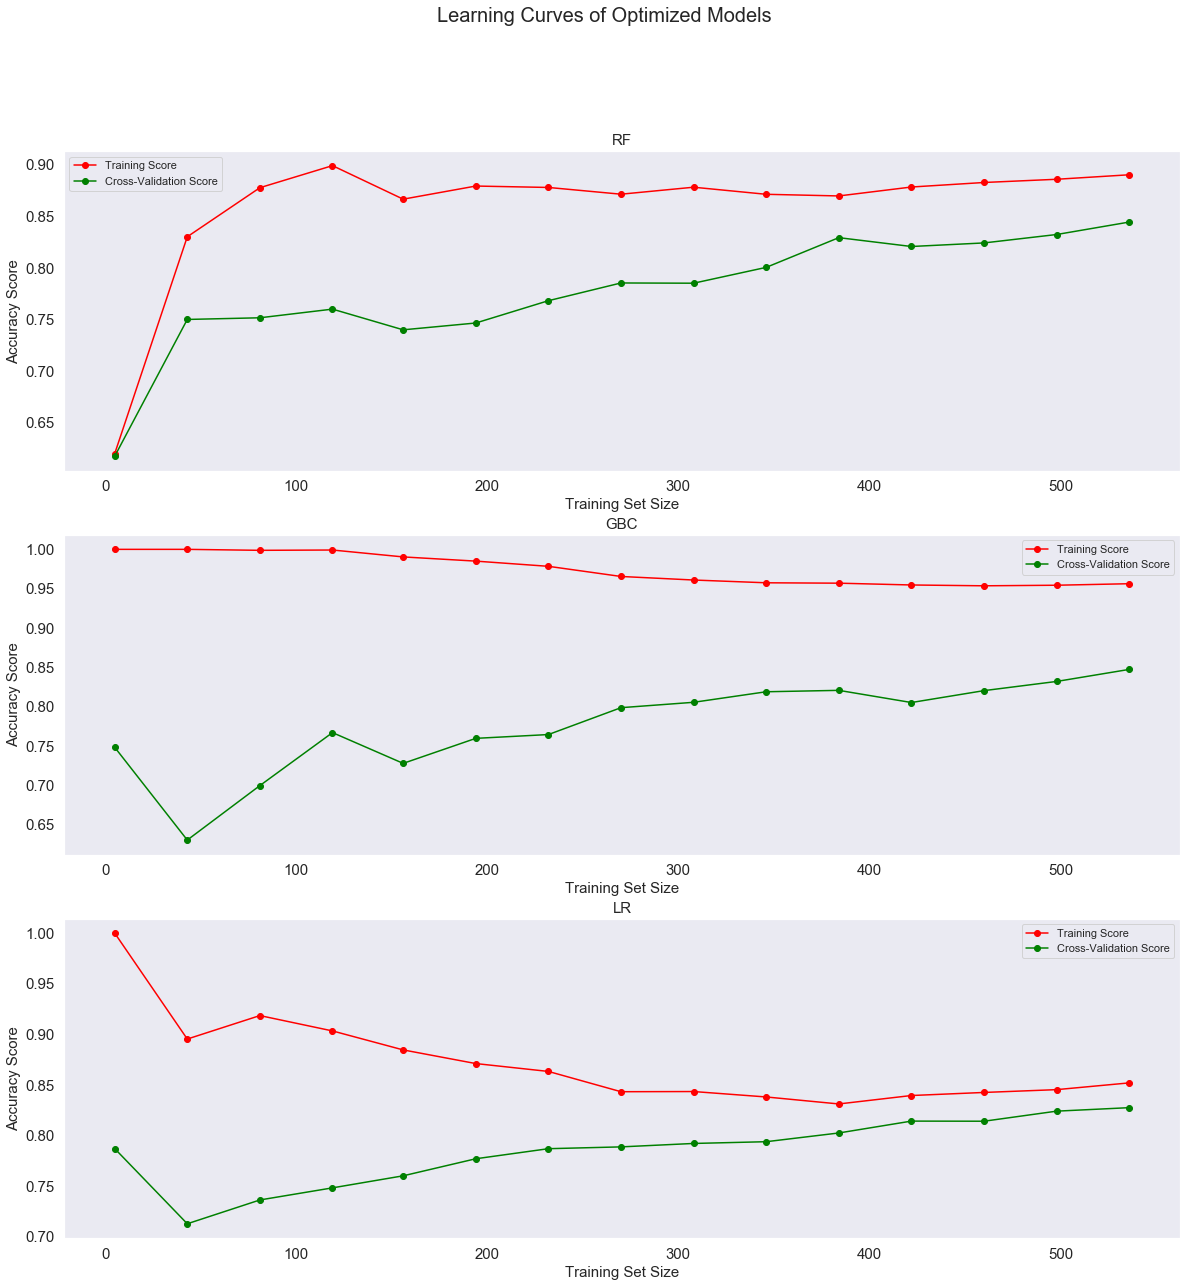

In [199]:
# Create figure space
plt.figure(figsize=(20,20))
learning_curve_models = [rf, gbc, lr]
learning_curve_labels = ['RF', 'GBC', 'LR']


# zip() maps the similar index of multiple containers so that they can be used just using as single entity

# Loop through model list: 
for ax, models, labels in zip(range(1,4), learning_curve_models, learning_curve_labels):
    plt.subplot(3,1,ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize=15)

plt.suptitle('Learning Curves of Optimized Models', fontsize=20)

## Evaluation

### Confusion Matrix

In [214]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Create a new function to cross-validate the training set    
def x_val_predict(model):
    predicted = cross_val_predict(model, X_train, y_train, cv=10)
    return predicted 

# Create a new function to return a confusion matrix
def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(y_train, predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)
    return display(confusion_matrix)

# Calculate confusion matrix of rf and gbc
print('**RF Confusion Matrix:**')
confusion_matrix(rf)
print('**GBC Confusion Matrix:**')
confusion_matrix(gbc)

**RF Confusion Matrix:**


Predicted,0.0,1.0,All
Actual,,,
0.0,332,36,368
1.0,56,172,228
All,388,208,596


**GBC Confusion Matrix:**


Predicted,0.0,1.0,All
Actual,,,
0.0,335,33,368
1.0,58,170,228
All,393,203,596


### Precision & Recall

In [246]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

rf_predictions = x_val_predict(rf)
print('RF:')
print("Precision:", precision_score(y_train, rf_predictions))
print("Recall:", recall_score(y_train, rf_predictions))
print("F1 Score:", f1_score(y_train, rf_predictions))

gbc_predictions = x_val_predict(gbc)
print('GBC:')
print("Precision:", precision_score(y_train, gbc_predictions))
print("Recall:", recall_score(y_train, gbc_predictions))
print("F1 Score:", f1_score(y_train, gbc_predictions))

RF:
Precision: 0.8269230769230769
Recall: 0.7543859649122807
F1 Score: 0.7889908256880734
GBC:
Precision: 0.8374384236453202
Recall: 0.7456140350877193
F1 Score: 0.7888631090487238


### Classification Report

In [221]:
from sklearn.metrics import classification_report

def class_report(model):
    predicted = x_val_predict(model)
    report = classification_report(y_train, predicted)
    return print(report)

print('**RF Classification Report:**')
class_report(rf)
print('**GBC Classification Report:**')
class_report(gbc)

**RF Classification Report:**
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       368
         1.0       0.83      0.75      0.79       228

    accuracy                           0.85       596
   macro avg       0.84      0.83      0.83       596
weighted avg       0.84      0.85      0.84       596

**GBC Classification Report:**
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       368
         1.0       0.84      0.75      0.79       228

    accuracy                           0.85       596
   macro avg       0.84      0.83      0.83       596
weighted avg       0.85      0.85      0.85       596



### Threshold Curve

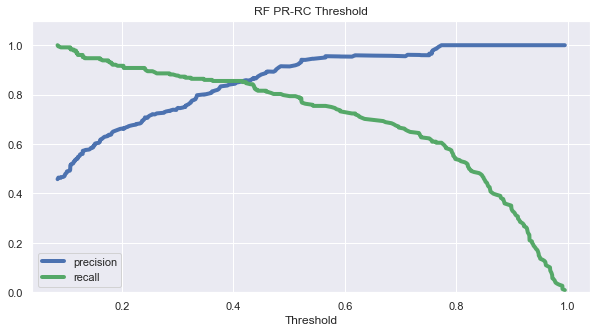

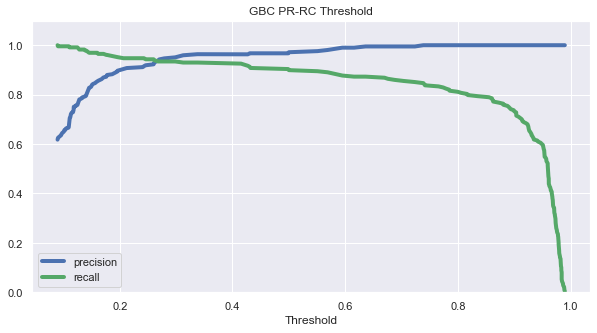

In [264]:
from sklearn.metrics import precision_recall_curve

# Define new function
def thres_curve(model, title):  
    
    # Get model probabilities 
    probability = model.predict_proba(X_train)[:, 1]
        
    # Create figure space
    plt.figure(figsize=(10, 5))
        
    # Get precision, recall, threshold values using precision_recall_curve() function
    precision, recall, threshold = precision_recall_curve(y_train, probability)
    
    # Create plot
    plt.plot(threshold, precision[:-1], 'b-', label='precision', lw=4)
    plt.plot(threshold, recall[:-1], 'g', label='recall', lw=4)
    plt.xlabel('Threshold')
    plt.legend(loc='best')
    plt.ylim([0, 1.1])
    plt.title(title)
    plt.show()

# Plot
thres_curve(rf, title='RF PR-RC Threshold')
thres_curve(gbc, title='GBC PR-RC Threshold')

### Precision-Recall Curve

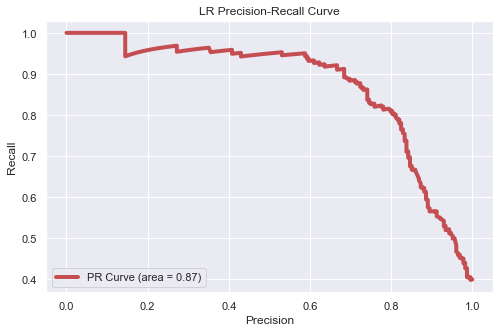

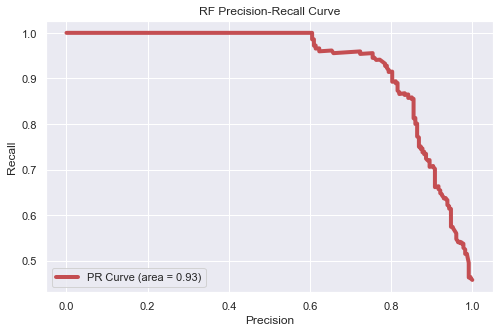

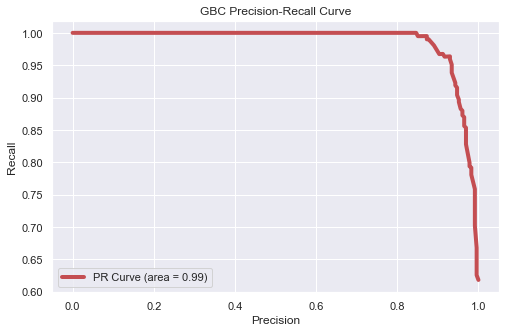

In [289]:
# Define new function
def pr_curve(model, title):
    
    # Get model probabilities
    probability = model.predict_proba(X_train)[:, 1]
    
    # Create figure space
    plt.figure(figsize=(8, 5))
    
    # Get precision, recall, threshold values using precision_recall_curve() function
    precision, recall, threshold = precision_recall_curve(y_train, probability)
    PR_AUC = auc(recall, precision)
    
    # Plot precision & recall
    plt.plot(recall, precision, 'r-', lw=4, label='PR Curve (area = %0.2f)' % PR_AUC)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.show()

# Plot
pr_curve(lr, title = 'LR Precision-Recall Curve')
pr_curve(rf, title = 'RF Precision-Recall Curve')
pr_curve(gbc, title = 'GBC Precision-Recall Curve')

### ROC-AUC Curve

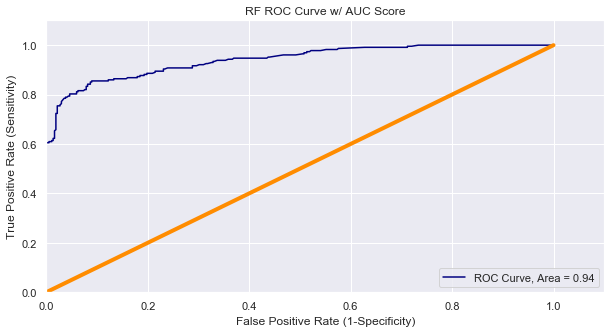

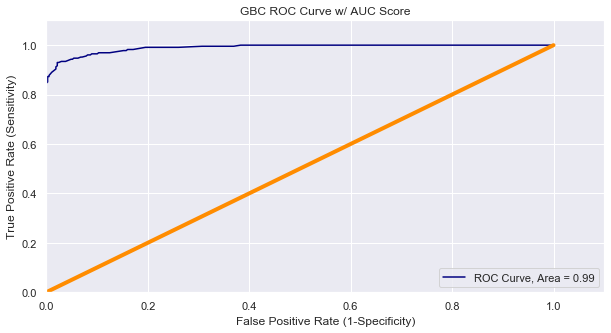

In [262]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define function
def roc_auc_curve(model, title):
    
    # Get model probabilities
    probability = model.predict_proba(X_train)[:, 1]
    
    # Create figure space
    plt.figure(figsize = (10, 5))
    
    # Call roc_curve() function to get FPR, TPR, Threshold values
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, probability)
    
    # Get ROC-AUC score by using roc_auc_score() function
    auc_score = roc_auc_score(y_train, probability)
    
    # Plot FPR & TPR
    plt.plot(false_positive_rate, true_positive_rate, color='navy',
             label="ROC Curve, Area = " + str(round(auc_score, 2)))
    plt.plot([0, 1], [0, 1], 'darkorange', lw=4)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1.1, 0, 1.1])
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

# Plot
roc_auc_curve(rf, title='RF ROC Curve w/ AUC Score')
roc_auc_curve(gbc, title='GBC ROC Curve w/ AUC Score')

## Extra: Notes on Modeling Process Breakdown & Algorithms/Models Used

The data points are split into the values of 0 or 1. Because of this, the data does not seem continuous where we would attempt to use a model for regression. 

Understanding what type of problem we are trying to solve is usually discovered in the initial phases of the project where we scope out what we are attempting to figure out and what are we going to do with the analysis. 

Key Takeaways
- Use a model for classification
- The dependent variable (Survival) is binary

### Logistic Regression

I believe it's always good to start with one of the more simpler models to get an idea on what to expect especially with computationally expensive calculations and be weary of memory usage. We can think of logistic regression as the first model to use in any classification problem, the go-to algorithm similar to linear regression if we are working on a numerical regression problem.

In a linear equation, it's written in the form of **y = mX + b** where:
- m = slope of the regression line (relationship between X and y)
- b = y-intercept
- x = independent variables
- y = dependent variable

The equation for a a simple linear regression is: **y = β0 + β1x + ϵ**
- y = dependent variable
- β0 = intercept (constant)
- β1 = coefficient of independent variable
- x = independent variable
- ϵ = error/residual

The function is used to predict the value of a dependent variable with an independent variable. We can also add more variables which will make it a multiple linear regression, which is normal and how the real world works as there is never just one variable to solve our problems. 

### Process Overview
In the beginning we created a function (training_accuracy) that would fit the model and score the model. Then we created another function (cv_score) to cross-validate the model using k-fold cross-validation. We will break it down without the functions because all it is are just steps grouped together so we don't have to redundant codes.

Using logistic regression as an example.

In [249]:
# Import LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Import metrics that would allow us to see how accurate the predictions are
from sklearn.metrics import accuracy_score

# Call model object (using glm() since a logistic regression is basically a generalized linear regression) 
glm = LogisticRegression(solver='liblinear') # in R it's also glm()

# Fit the model with X_train, y_train
glm.fit(X_train, y_train)

# Once trained, find out how the model has performed
y_pred_glm = glm.predict(X_test)

# Compare predicted value to the actual test_y variable
print('Logistic Regression Accuracy Score: {}'.format(round(accuracy_score(y_pred_glm, y_test), 4)))

Logistic Regression Accuracy Score: 0.8231


In [254]:
# Accuracy score
glm_acc = round(accuracy_score(y_pred_glm, y_test), 2)

# Store the best_score_ values into a new dataframe
score_df = pd.DataFrame({'Score': [glm_acc]})

# Create index names
score_df.index = ['GLM']

# Sort the dataframe (if multiple scores)
score_df = score_df.sort_values(by='Score', ascending=False)

# Return dataframe
print('**Score for Model:**')
display(score_df)

**Score for Model:**


,Score
GLM,0.82


So the starting steps above were:
1. Import the library with the model
2. Instantiate the model and use 'liblinear' argument for the solver parameter (lgorithm to use in the optimization problem.)
3. Fit the model with the training data
4. Predict using the model with the test (independent) data
    - This will give you values of 0 or 1
    - To get the actual probabilities, there is another function that is used
5. Get the accuracy score using the predicted y (dependent) values and the test (dependent) data
6. You will now have an accuracy score which is basically how many did you predict true was actually true and how many false was actually false
    - See below for a list of performance measures

### Confusion Matrix (Evaluating Performance)

A confusion matrix is basically a table that will identify what classified labels we got wrong and what we got right and of course, the higher the number for the sum of TP and TN, the better. If this was a regression problem then we could use regression evaluation metrics listed below:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R Squared (R²)
- Adjusted R Squared (R²)
- Mean Square Percentage Error (MSPE)
- Mean Absolute Percentage Error (MAPE)
- Root Mean Squared Logarithmic Error (RMSLE)

Here are some performance metrics used in the confusion matrix below:

- TP - correct positive prediction
- TN - correct negative prediction
- FP - Type I Error (case negative but predicted positive)
- FN - Type II Error (case positive but predicted negative)
- Accuracy
    - (TP + TN)/Total
- Precision - how accurate is the model of those predicted positive that are actually positive
    - TP/(TP + FP)
- Recall (True Positive Rate) - how many actual positives the model labeled over the total positives
    - TP/(TP + FN) which is also TP/All P
- Specificity (True Negative Rate) - number of correct negative predictions
    - TN/(TN + FP) which is also TN/All N
- F1 Score - weighted average of TPR (Recall) and Precision, a better measure to seek a balance between Precision and Recall especially when there is an uneven class distribution like cancer detection where there can be 10,000 negatives and only 1 positive
    - 2 * ( (Pr * Rc) / (Pr + Rc) )
- ROC Curve
    - Graph used to summarize the performance at various thresholds by plotting the TPR against FPR

### AUC - ROC Curve

Now that we have the predicted values and have TPR/FPR scores, let's move to the next step and create a plot that will show graphically the various thresholds of distinguishing classes.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

Classification Score: 0.86062


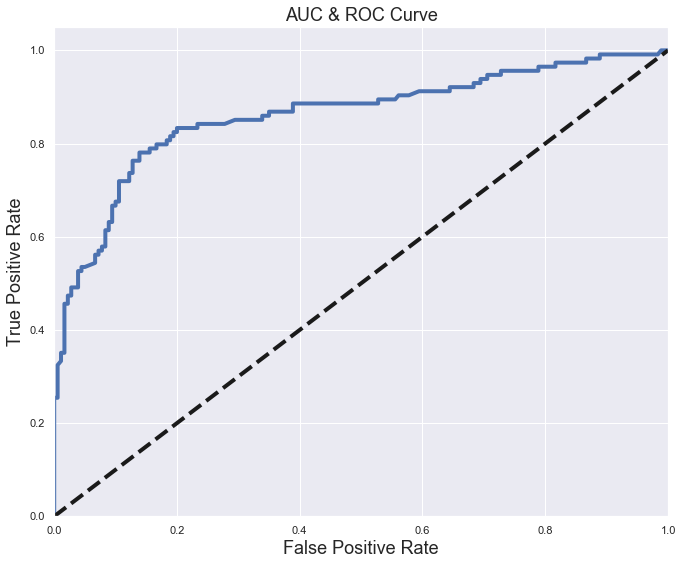

In [257]:
# Import the module with the roc_curve() and auc() functions
from sklearn.metrics import roc_curve, auc

# Call decision_function() from LogisticRegression()
y_score = glm.decision_function(X_test)

# If we wanted probabilities we would use predict_proba() function
glm_y_probabilities = glm.predict_proba(X_test)

# Call roc_curve() function passing the scores
FPR, TPR, _ = roc_curve(y_test, y_score)

# Get plot values from auc() function
ROC_AUC = auc(FPR, TPR)
print('Classification Score: ' + str(round(ROC_AUC,5)))
      
# Plot figure sizes
plt.figure(figsize=(11,9))
plt.plot(FPR, TPR, label='ROC curve(Area = %0.2f)' % ROC_AUC, linewidth=4)

# Set plot dimensions, title, labels, axis limits, etc.
plt.plot([0,1], [0,1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('AUC & ROC Curve', fontsize=18)
plt.show()

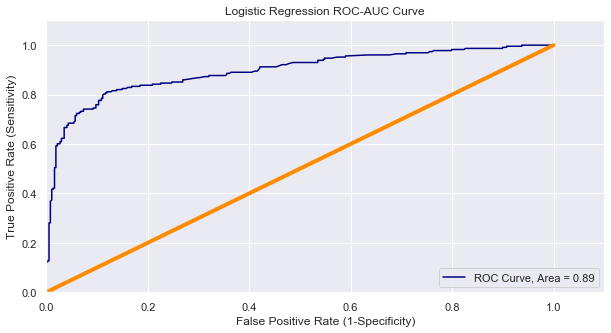

In [265]:
# Using the function created earlier
roc_auc_curve(glm, 'Logistic Regression ROC-AUC Curve')

### Precision-Recall Curve

The precision-recall curve summarizes the trade-off between the true positive rate and the postive predictive value for a predictive model using different probability thresholds.

When should we use a ROC Curve?
- they are more appropriate when the observations are balanced between each classes

When should we use a Precision-Recall curve?
- they are more appropriate for imbalanced datasets like cancer detecction/spam

Here are two curve plots below. The first one is a logistic regression pr curve without tuning. The red curve is a tuned logistic regression with tuned hyperparameters so it's a little bit better.

Precision-Recall Score: 0.84054


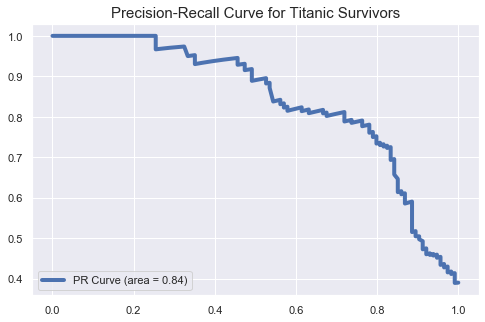

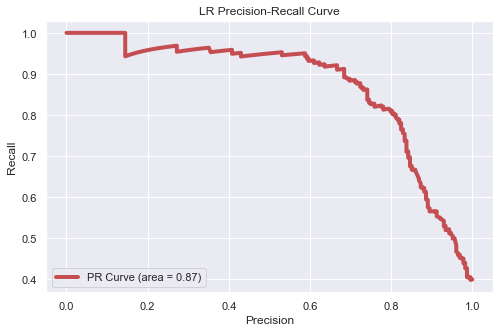

In [308]:
from sklearn.metrics import precision_recall_curve

# Get y_score by LogisticRegression().decision_function(test)
y_score_glm = glm.decision_function(X_test)

# Use precision_recall_curve(test_y, y_score) to get pr-rc values
# (ValueError: too many values to unpack (expected 2) without "_" 
precision, recall, _ = precision_recall_curve(y_test, y_score_glm)

# Calculate auc by auc() function
PR_AUC = auc(recall, precision)
print('Precision-Recall Score: ' + str(round(PR_AUC,5)))

# Create figure space and create plt.plot() and set plot titles, labels, etc.
plt.figure(figsize=(8,5))
plt.plot(recall, precision, label='PR Curve (area = %0.2f)'%PR_AUC, linewidth=4)
plt.title('Precision-Recall Curve for Titanic Survivors', fontsize=15)
plt.legend(loc='lower left')

ax1 = pr_curve(lr, title = 'LR Precision-Recall Curve') # Original function from earlier

### Cross-Validation

So after creating the baseline models, and checking on some evaluation methods on results, we want to make the model better. We want to make sure that we the model is not a one time fluke so we validate it through several iterations. I usually use a KFold method which splits the training data into 9 parts training and 1 part validation if the K is 10.

Some types of cv methods: KFold, StratifiedShuffleSplit, StratifiedKFold or ShuffleSplit

In KFolds, each test set should not overlap, even with shuffle. With KFolds and shuffle, the data is shuffled once at the start, and then divided into the number of desired splits. The test data is always one of the splits, the train data is the rest.

In ShuffleSplit, the data is shuffled every time, and then split. This means the test sets may overlap between the splits.

Check the sklearn guide for more info.

In [324]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

# Call cv function - run model 10x with 75/25 split leaving out 10%
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

# Use standard scale for the dataset & save the feature names for decision tree display
''' 
look back in the initial pre-modeling step where i split my variables

# Split the variables
y = mtrain['Survived']
x = mtrain.drop(['Survived'], axis=1)
'''

''' REORDER COLUMN NAMES -------------------------------------------------------------

Example 1
Reorder column names next time to see if this fixes the XGboost error later on
    df = df.reindex(sorted(df.columns), axis=1)
    x = x.reindex(sorted(x.columns), axis=1)
    
Example 2
    df[sorted(df.columns)]
    x[sorted(x.columns)]

Example 3
    df[sorted(df)]
    x[sorted(x)]
    
Example 4
    df.sort_index(axis=1, inplace=True)
    x.sort_index(axis=1, inplace=True)
-----------------------------------------------------------------------------------'''

column_names = train.columns
accuracies_test = cross_val_score(LogisticRegression(solver='liblinear'), X_test, y_test, cv=cv)
accuracies_train = cross_val_score(LogisticRegression(solver='liblinear'), X_train, y_train, cv=cv)

# Print accuracy and mean accuracy
print('Cross-validation Accuracy Scores: \n{}\n'.format(accuracies_test))
print('Mean Cross-validation Accuracy Test Score: {}'.format(accuracies_test.mean(), 5))
print('Mean Cross-validation Accuracy Train Score: {}'.format(accuracies_train.mean(), 5))

Cross-validation Accuracy Scores: 
[0.78378378 0.77027027 0.74324324 0.66216216 0.7972973  0.81081081
 0.78378378 0.75675676 0.85135135 0.78378378]

Mean Cross-validation Accuracy Test Score: 0.7743243243243244
Mean Cross-validation Accuracy Train Score: 0.8134228187919463


### Grid Search, Parameters & Hyperparameters

Gridsearch is a simple concept in machine learning for when we are searching for optimal parameters over a specified "grid". These optimal parameters are known as Hyperparameters which are different than parameters. 

Hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data. In other words, they cannot be learned during training and are set beforehand. For example, ntrees for random forest.
- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.


Model parameters are the properties of the training data that are learned during training. They are the part of the model that is learned from historical training data.
- A configuration variable that is internal to the model and whose value can be estimated from data.
- They are required by the model when making predictions.
- They values define the skill of the model on your problem.
- They are estimated or learned from data.
- They are often not set manually by the practitioner.
- They are often saved as part of the learned model.

When a machine learning algorithm is tuned for a specific problem, such as when you are using a grid search or a random search, then you are tuning the hyperparameters of the model in order to discover the parameters of the model that result in the most accurate predictions.

Many models have important parameters which cannot be directly estimated from the data. For example, in the K-nearest neighbor classification model K… This type of model parameter is referred to as a tuning parameter because there is no analytical formula available to calculate an appropriate value. 
- Page 64-65, Applied Predictive Modeling, 2013

**Key: If you have to specify a model parameter manually then it is probably a model hyperparameter.**

### Logistic Regression Grid Search

In [330]:
from sklearn.model_selection import GridSearchCV, KFold

# C_vals is the alpha value of lasso and ridge regression ( as alpha increases, model complexity decreases )
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

# Choosing penalties for (Lasso(11) or Ridge(12))
penalties = ['l1','l2']

# Choose cross-validation method
cv = KFold(n_splits=10, shuffle=False)

# Set param in param_grid in GridSearchCV
param = {'penalty': penalties, 'C': C_vals}

# Model
glm = LogisticRegression(solver='liblinear')

# Call GridSearchCV object
grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                    param_grid=param,
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=cv
                   )

# Fitting the model
grid.fit(X_train, y_train)

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             pre_dis

In [331]:
# Get best results
print('Best Score: {}\n'.format(grid.best_score_))
print('Best Parameters: {}\n'.format(grid.best_params_))
print('Best Estimator: {}'.format(grid.best_estimator_))

Best Score: 0.8288590604026845

Best Parameters: {'C': 2, 'penalty': 'l1'}

Best Estimator: LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


### Now use the best parameters found by grid search

In [338]:
# Use the best estimator on the new score
glm_grid = grid.best_estimator_

# Method 1: get y_pred_glm using predict() then accuracy_score()
y_pred_glm_grid = glm_grid.predict(X_test)
glm_grid_accuracy_score = round(accuracy_score(y_pred_glm_grid, y_test),4)

# Method 2: use glm_grid.score(test_x, test_y)
glm_grid_accuracy_score2 = glm_grid.score(X_test, y_test)

In [341]:
# Print scores
print('Mean Cross-validation Accuracy Score: {}'.format(accuracies_test.mean(), 5))

# Print tuned scores
print('Method 1 - Score: {}'.format(glm_grid_accuracy_score))

# Using score() method saves 2 lines of work predict() and accuracy_score()
print('Method 2 - Score: {}'.format(glm_grid_accuracy_score2)) 

Mean Cross-validation Accuracy Score: 0.7743243243243244
Method 1 - Score: 0.8197
Method 2 - Score: 0.8197278911564626


As we can see from the results above, the first cv logistic model gives us a score of about 77%, it increased by about 5% once we tuned the hyperparameters of the logistic (which resulted in a lasso or a ridge regression)

Keep in mind that lasso/ridge regression is basically a linear regression with penalty terms (uses shrinkage). 
- Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)

### K-Nearest Neighbors (KNN) - [Link](https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/)

KNN is a model that stored the entire training dataset so there is no learning required. Efficient implementations can store the data using complex data structures like [k-d trees](https://en.wikipedia.org/wiki/K-d_tree) to make look-up and matching new patterns during prediction efficient.

Because of how the model stores the entire training dataset, we may want to think carefully about the consistency of the training data. It might be good to curate it and update as often as possible.

The way KNN predictions are made is that for every new instance (x) by searching through the entire training set for the K most similar instances (neighbors) and summarizing the output variable for those K instances. For regression this might be the mean output variable, in classification this might be the mode (or most common) class value.

It's used to determine which of the K instances in the training dataset are most similar to a new input a distance measure is used. For real-valued input variables, the most popular distance measure is [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).

Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

    EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )
    
Other popular distance measures include:
- Hamming Distance: Calculate the distance between binary vectors
- Manhattan Distance: Calculate the distance between real vectors using the sum of their absolute difference. Also called City Block Distance
- Minkowski Distance: Generalization of Euclidean and Manhattan distance

Euclidean is a good distance measure to use if the input variables are similar in type (all widths/heights). Manhattan distance is a good measure to use if the input variables are not similar in type (age, gender, height).

The value of K can be found by algorithm tuning. It is a good area to try many different alues for K and see what works best.

Computational complexity of KNN increases with the size of the training dataset. For large datasets, KNN can be made stochastic by taking a sample from the training set to calculate K-most similar instances.

Different disciplines have different names:

- **Instance-Based Learning**: The raw training instances are used to make predictions. As such KNN is often referred to as instance-based learning or a case-based learning (where each training instance is a case from the problem domain).
- **Lazy Learning**: No learning of the model is required and all of the work happens at the time a prediction is requested. As such, KNN is often referred to as a lazy learning algorithm.
- **Non-Parametric**: KNN makes no assumptions about the functional form of the problem being solved. As such KNN is referred to as a non-parametric machine learning algorithm.

**Excerpt from Link Below**

KNN for Classification

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

Class probabilities can be calculated as the normalized frequency of samples that belong to each class in the set of K most similar instances for a new data instance. For example, in a binary classification problem (class is 0 or 1):

    p(class=0) = count(class=0) / (count(class=0)+count(class=1))

If you are using K and you have an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

Ties can be broken consistently by expanding K by 1 and looking at the class of the next most similar instance in the training dataset.

### Best Preparation Steps for KNN
- **Rescale Data** - performs much better if all of the data has the same scale especially if it's Euclidean. Normalizing your data to the range (0,1) is a good idea. It may also be a good idea to standardize your data if it has a Gaussian (normal) distribution
- **Address Missing Data** - missing data will mean that the distance between the samples can not be calculated. These samples could be excluded or the missing values could be imputed depending on how will it affect the model
- **Lower Dimensionality** - KNN is suited for lower dimensionality. You can try it on high dimensional data but it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space (PCA -> KNN) 
*********
Resources to read
*********
- [Tutorial to implment kNN from Scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
- Applied predictive modeling book (chapter 7, 13)
- [Intro to statistical learning](https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf) (page 154)

In [342]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

# Call the model object
knn = KNeighborsClassifier(metric='minkowski', p=2)

# 10-fold cv using stratified shuffle split
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=2)

# Cross-validate score using cross_val_score
accuracies_knn = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
print('Cross-Validation Accuracy Score:\n {}'.format(accuracies_knn))
print('Mean Cross-Validation Accuracy Score: {}\n'.format(round(accuracies_knn.mean(), 3)))

Cross-Validation Accuracy Score:
 [0.81208054 0.79865772 0.76510067 0.76510067 0.87248322 0.85234899
 0.77181208 0.80536913 0.84563758 0.79865772]
Mean Cross-Validation Accuracy Score: 0.809



In [343]:
# Search for an optimal value of K for KNN
k_range = range(1,31)
k_scores = []

# Loop through the range
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())

print("Accuracy Scores: {}\n".format(k_scores))
print ("Mean Accuracy Scores: {}".format(np.mean(k_scores)))  
print('pretty garbage...')

Accuracy Scores: [0.7711409395973156, 0.7838926174496643, 0.8087248322147651, 0.8127516778523491, 0.8087248322147651, 0.8073825503355705, 0.810738255033557, 0.8033557046979866, 0.8114093959731543, 0.8114093959731544, 0.8134228187919463, 0.8026845637583893, 0.8013422818791947, 0.8060402684563759, 0.7966442953020134, 0.7885906040268457, 0.7885906040268457, 0.783221476510067, 0.7852348993288591, 0.7751677852348993, 0.7825503355704697, 0.7771812080536913, 0.7818791946308725, 0.7731543624161074, 0.7778523489932886, 0.7697986577181208, 0.7704697986577183, 0.7624161073825503, 0.7664429530201342, 0.759731543624161]

Mean Accuracy Scores: 0.7897315436241609
pretty garbage...


### Plotting K and accuracy

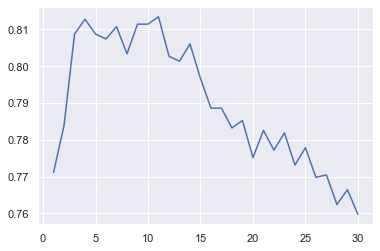

In [344]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

### Trying RandomizedCV for faster results

In [346]:
from sklearn.model_selection import RandomizedSearchCV

# Multiple values for k
k_range = range(1,31)

# What is weights_options?
weights_options=['uniform','distance']

# Create a param variable to be used in the grid
param = {'n_neighbors':k_range, 'weights':weights_options}

# Use StratifiedShuffleSplit 
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=15)

# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = RandomizedSearchCV(KNeighborsClassifier(),
                          param,
                          cv=cv,
                          verbose=False,
                          n_jobs=-1,
                          n_iter=50
                         )

# Fit the model
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
                   error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=False)

In [347]:
# Get best results
print('Best Score: {}\n'.format(grid.best_score_))
print('Best Parameters: {}\n'.format(grid.best_params_))
print('Best Estimator: {}'.format(grid.best_estimator_))

Best Score: 0.788826815642458

Best Parameters: {'weights': 'uniform', 'n_neighbors': 20}

Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


In [349]:
# Use the best parameters for the test data
knn_ran = grid.best_estimator_
print('New KNN Score w/ Randomized CV: {}'.format(knn_ran.score(X_test, y_test)*100))

New KNN Score w/ Randomized CV: 76.53061224489795


### Gaussian Naive Bayes - [Link](https://scikit-learn.org/stable/modules/naive_bayes.html)

We are interested in selecting the best hypothesis (h) given given data (d). In a classification problem like this, our hypothesis may be the class to assign a new data instance.

One of the simplest ways to selecting the most probably hypothesis given the data that we have that we can use as our "prior knowledge" about the problem is to use Bayes' Theorem. The theorem provides us a way where we can calculate the probability of a hypothesis give our prior knowledge.

Baye's Theorem

    P(h|d) = (P(d|h) * P(h)) / P(d)

- P(h|d) is the probability of hypothesis h given the data d. This is called the posterior probability.
- P(d|h) is the probability of data d given that the hypothesis h was true.
- P(h) is the probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.
- P(d) is the probability of the data (regardless of the hypothesis).

We are interested in calculating the posterior probability of P(h|d) from the prior probability p(h) with P(d) and p(d|h).

After calculating the posterior probability for a anumber of difference hypothese, you can select the hypothesis with the highest probability. This is called the maximum a posteriori (MAP), which is the maximum probably hypothesis.

Which can be written out like this:

    MAP(h) = max(P(h|d))

    or

    MAP(h) = max((P(d|h) * P(h)) / P(d))

    or

    MAP(h) = max(P(d|h) * P(h))

The P(d) is a normalizing term which allows us to calculate the probability. We can drop it when we are interested in the most probable hypothesis as it is constant and only used to normalize.

If we have an even number of instances in each class in our training data, then the probability of each class (P(h)) will be equal. Since this would be a constant term in the equation, we could drop it so that we end up with the first formula.

    MAP(h) = max(P(h|d))

### Naive Bayes Classifier

This is a classification algorithm for binary and multi-class classification problems. This is easiest to understand when described using binary or categorical input values.

It's called naive Bayes because the calculation of the probabilities (p) for each hypothesis are simplified to make their calculation manageable. 

The representation for naive Bayes is probabilities.

A list of probabilities are stored to file for a learned naive Bayes model. This includes:

- Class Probabilities: The probabilities of each class in the training dataset.
- Conditional Probabilities: The conditional probabilities of each input value given each class value.

**More information to read and go back to - [Link](https://machinelearningmastery.com/naive-bayes-for-machine-learning/)**

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

### Support Vector Machines (SVM) - [Link](https://scikit-learn.org/stable/modules/svm.html)

Documentation Notes

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

scikit-learn & numpy

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

**Example**

Imagine sitting on a bed and you want to identify your entire body shape only, you got two options:
1. Place a flat surface big enough to cover the bed on top of your head
2. Place a blanket to cover the entire bed over your head

The entire space is from your bed ground up to the ceiling in a rectangle/square shape. By placing the flat surface on your head in option 1, you created a hyperplane (separator) between you (the object) we want to classify and the empty space above including the extra space all around you that has not been covered due to the flat board's shape.

Now, by placing a blanket in option 2, you have created a new separator that shapes the entire body space and removing all the extra space around you that it does not capture.

Which option would be more accurate in representation the classification of your body with minimal error (no extra space)? I would think option 2 would be best. You have just designed a type of SVM hyperplane, although it might overfit if it's just me if we are going to use it on another person.

**MLM Notes - [Link](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)**

The Maximal-Margin Classifier is a hypothetical classifier that best explains how SVM works in practice.

The numeric input variables (x) in your data (the columns) form an n-dimensional space. For example, if you had two input variables, this would form a two-dimensional space.

A hyperplane is a line that splits the input variable space. In SVM, a hyperplane is selected to best separate the points in the input variable space by their class (0 or 1). In 2D you can visualize this as a line. Formula below:

    B0 + (B1 * X1) + (B2 * X2) = 0

The coefficients (B1 and B2) determine the slope of the line and the intercept (B0) is found by the learning algorithm and X1 and X2 are input variables.

The distance between the line and the closest data points is referred to as **the margin**. The best or optimal line that can separate the two classes is the line that has the largest margin. This is called the **Maximal-Margin Hyperplane**.

What are support vectors?

The support vector machine searches for the closest points, which it calls the "support vectors" (the name "support vector machine" is due to the fact that points are like vectors and that the best line "depends on" or is "supported by" the closest points). In other words, they are data points that lie closest to the decision surface (hyperplane). 

### Graphical Representation of SVM

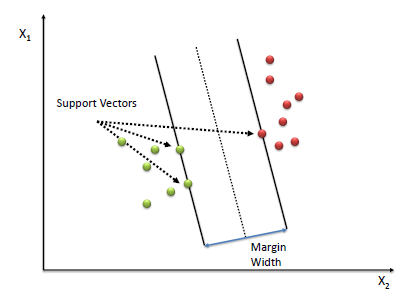

In [351]:
# Image from saedsayad.com
url = 'https://www.saedsayad.com/images/SVM_2.png'
Image(url, width=500, height=500)

Types of SVM below


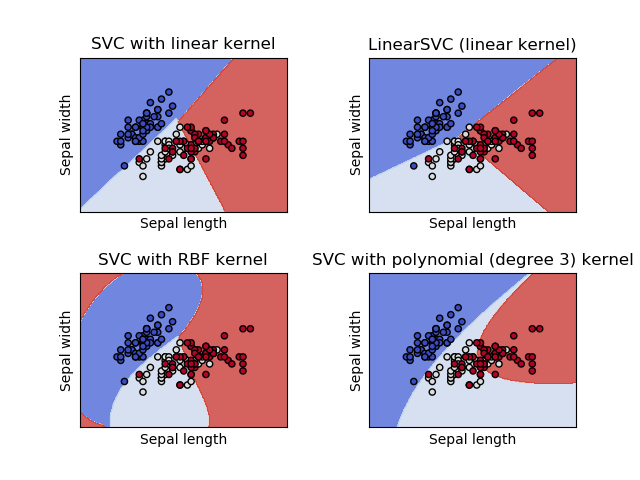

In [352]:
print('Types of SVM below')
url = 'https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png'
Image(url, width=600, height=600)

### Following the same steps as before (This will be the last one with examples)

In [353]:
from sklearn.svm import SVC

# Set cost and gamma list of penalties, which are hyperparams of SVM
C_list = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10] # cost/error/regularization
gammas = [0.0001, 0.001, 0.01, 0.1, 1] # variance/influence of samples selected by the model as support vectors
# When gamma is too low, the model is too constrained and does not capture complexity effectively

# Set param grid of both the cost and gamma (nonlinear hyperparameters for radial kernels)
param_svm = {'C': C_list, 'gamma': gammas}

# Documentation grid
param_svm_sample = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Cross-validation using StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=15)

# Grid search cross-validation using the 'rbf' kernel (gaussian kernel)
svm_grid_search = GridSearchCV(SVC(kernel='rbf',
                               probability=True),
                               param_svm,
                               cv=cv)

# Fit the grid
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [357]:
# Get best results
print('Best Score: {}\n'.format(svm_grid_search.best_score_))
print('Best Parameters: {}\n'.format(svm_grid_search.best_params_))
print('Best Estimator: {}'.format(svm_grid_search.best_estimator_))

# Use the best parameters with the test data
svm_grid = svm_grid_search.best_estimator_

# Get predicted dependent variable using predict() method with the model
y_pred_svm = svm_grid.predict(X_test)

# Get accuracy of the test data vs. testing data
svm_accuracy = round(accuracy_score(y_pred_svm, y_test), 4)

# Return results of the training and test scores
print('\nSVM (Rbf) Train Score: {}'.format(svm_grid.score(X_train, y_train)))
print('SVM (Rbf) Test Score: {}'.format(svm_accuracy))

Best Score: 0.8178770949720671

Best Parameters: {'C': 2.5, 'gamma': 0.01}

Best Estimator: SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVM (Rbf) Train Score: 0.8573825503355704
SVM (Rbf) Test Score: 0.8197


### Decision Tree Classifier - [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Decision Trees (DT) are non-parametric supervised learning methods used for classification and regression (CART). 

Non-parametric means the number of parameters grow with the size of the training set. Algorithms that do not make strong assumptions about the form of the mapping function. By not making assumptions, they are free to learn any functional form from the training data. These methods are good when you have a lot of data and no prior knowledge and don't have to worry too much about choosing the right featurs to use.

Nonparametric methods seek to best fit the training data in constructing the mapping function, while maintaining some ability to generalize to unseen data. We have also look at kNN and SVM algorithms which are also considered to be nonparametric.

The benefits of np algs are:
- Flexibility - capable of fitting a large number of functional forms
- Power - no assumptions (or weak assumptions) about the undering function
- Performance - can result in higher performance for prediction

Limitations:
- More data - requires a lot more training data to estimate the mapping function
- Slower - a lot slower to train as they often have far more parameters to train
- Overfitting - more of a ask to overfit the training data and it is harder to explain why specific predictions are made

There can be an assumption that your data comes from a Gaussian distribution, but your data is highly non-Gaussian.  In that case, you'll get bad predictions by using certain algorithms that are parametric. 

By using non-parametric models, you can do prediction of data for very complicated distributions without knowing or assuming "this data is approximately Gaussian/exponential/bernoulli," which could be very wrong.

****
So the idea behind the decision tree is simple and it is easy to interpret on why predictions were made at certain levels. Knowing decision trees is good since it is part of the foundation topics for more advanced methods such as ensembling (bagging, random forest, gradient boosting).

CART classification model is basically a binary tree. (Note: Same binary tree from algs and data structures) In a DT, we have nodes (parent, child) that represents a single input variable (x) and a split point on that variable assuming that variable is numeric. The leaf nodes (terminal nodes) of the tree contain an output variable (y) which is used to make a prediction.

You can think of a tree as a sort of flowchart, a graphical representation of possible solutions based on conditional statements. The deeper the tree grows to the more complex and memory intensive the algorithm becomes.

Other ways to think of this is that it looks at the initial dataset and breaks it own into smaller subsets based on conditional statements. 

The way a node splits is through a series of methods:
- Gini Impurity (split at lower) 
- Information Gain
- Entropy

## End

In [363]:
# Final Models & Results
pd.DataFrame({'Model': ['RF', 'GBC', 'LR'], 'Scores': score_list})

,Model,Scores
0,RF,84.620690
1,GBC,84.747126
2,LR,82.758621


### More Topics

Imbalanced
- What if the accuracy is 99%? Does this mean that are model is great and we should use it right away? Well we first have to understand how our distribution looks like. For example, if we are looking at a problem like cancer detection or spam detection, the numbers are very low. Let's say we have a 100K dataset to train on and only 10 cancer cells are detected, but it the model only accounted for 1 cancer cell out of the 10. That's not a very good model so we have to use other performance measures like the F1 score that will take into account the probabilities of both the positive predictions and the negative predictions and takes an average, which is a better measure vs. accuracy.

Underfitting
- when the model fails to capture important aspets of the data and therefore introduces more bias and performs poorly
- basically means that the model did not learn enough from the data to discover patterns/trends
- too little complexity
- more bias and less variance

Overfitting
- when the model performs too well on the training data but does poorly in the validationg or test sets
- basically means that the model learned too closely to the training data and is unable to get patterns and trends from newer data
- too much complexity
- less bias and more variance

Bias-Variance Tradeoff
- attempt to optimize bias and variance to get the best parameters for the model
    - bias is due to erroneous or over simplistic assumptions in the algorithm which will lead to the model underfitting
    - variance is the error due to too much complexity which will lead the model to overfitting (noise from training data)
- in other words, this is a tradeoff; meaning it's a balance between two desirable features

Some models deal with the bias-variance tradeoff like regularization models (ridge, lasso, elastic-net) These models are built to deal with issues like these and attempts to find the optimal point where error is minimized.

Overfitting Solutions
1. simplify the model by using less parameters/data/features
2. simplify the model by changing hyperparameters
3. introduce regularized models
4. use more training data
5. gather more data (better quality)
5. cross-validation
6. try a different model

### Evaluating the model

As we are measuring the model, we want to answer some questions to see if the model is useful or not. Some questions below could be asked:

What are the most important features?
- Relative feature importance
Which features have the biggest impact on the model?
- Permutation importance (new)
How does changes in those features affect the model success?
- Partial dependencies (new)
Decisions made by the model
- SHAP values (new)

Model explainability
- Can you explain what the model is doing?
- What features does the model think is the best?
- Will this be reproducible and maintainable?
- Model runtime/statistics/results

### Afterthoughts
GH Notes
- If your train accuracy is great but your validation accuracy is poor, this likely means that your model has overfit to the training data (High Variance)
    - Reduce model complexity (use less features)
    - Gather more data
    - Regularization methods
- If your training accuracy just isn't good enough, you could be suffering from underfitting (High Bias)
    - Increase model complexity (add features)
    - Feature engineering (applied ML)
    - Add useful data
- Other 
    - Check the quality of your training data and make sure you’re loading everything in properly
    - Adjust hyperparameters
    - Grid search might be the best approach, but keep in mind it can get extremely computationally expensive.
        - Random Search
    - Start with a very simple model and only a couple of training points, and make sure your model is able to learn that data. Once it gets 100% accuracy, start increasing the complexity of the model, as well as loading in more and more of your whole dataset
